In [2061]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# %pip install haversine
from haversine import haversine
from scipy.optimize import curve_fit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

#### QUESTION 1

In [2062]:
# LOADING HISTORY MONTHLY RAINFALL DATASET FOR EACH OF THE THIRTY DISTRICTS IN RWANDA
rainFall = pd.read_csv("RwandaDistrictRainfall.csv", skiprows=1)

# CHECK THE FIRST 5 ROWS OF THE DATASET FOR RAINFALL
rainFall.head()

Month   JAN   FEB    MAR    APR   MAY   JUN   JUL   AUG   SEP  ...  \
0  Nyarugenge  52.9  52.9  100.0  103.9  84.4  15.6  11.8  17.6  29.4  ...   
1      Gasabo  52.9  60.4  113.3  103.1  74.9  17.6  11.8  23.5  29.4  ...   
2    Kicukiro  52.2  60.8  107.1  106.1  84.6  17.2  11.8  21.8  29.4  ...   
3      Nyanza  52.9  52.9  100.0  105.9  82.4  17.6  11.8  17.6  29.4  ...   
4    Gisagara  51.1  58.8  104.6  107.7  74.4  17.6  11.8  21.4  29.4  ...   

   MAR.14  APR.14  MAY.14  JUN.14  JUL.14  AUG.14  SEP.14  OCT.14  NOV.14  \
0   135.3   121.7    43.2    23.5    11.8    50.9    72.6   105.9   113.8   
1   156.0   132.5    47.1    19.2    11.8    51.4    74.9   113.3   123.5   
2   146.1   122.8    40.9    22.8    11.8    50.5    69.4   110.5   117.6   
3   135.3   117.6    41.2    23.5    11.8    52.9    70.6   105.9   111.8   
4   142.0   127.6    37.9    21.3    11.8    43.8    59.7   118.3   124.6   

   DEC.14  
0    66.7  
1    72.1  
2    68.9  
3    64.7  
4    65.9  

[5 rows x 181 columns]

In [2063]:
# LOADING HISTORY MONTHLY VEGETATION DATASET FOR EACH OF THE THIRTY DISTRICTS IN RWANDA
vegetation = pd.read_csv("RwandaDistrictVegetation.csv", skiprows=1)

# CHECK THE FIRST 5 ROWS OF THE DATASET FOR VEGETATION
vegetation.head()


District  JAN  FEB  MAR  APR         MAY         JUN         JUL  \
0  Nyarugenge  NaN  NaN  NaN  NaN  127.133558  114.194658   97.707394   
1      Gasabo  NaN  NaN  NaN  NaN  134.274365  121.746863  101.761017   
2    Kicukiro  NaN  NaN  NaN  NaN  127.197642  112.709287   95.870810   
3      Nyanza  NaN  NaN  NaN  NaN  130.407565  115.476082  100.632357   
4    Gisagara  NaN  NaN  NaN  NaN  124.877629  113.087827  100.303528   

         AUG        SEP  ...      MAR.14      APR.14      MAY.14      JUN.14  \
0  95.699328  88.729965  ...  113.596873  133.532356  128.071603  116.118307   
1  96.821079  89.282895  ...  115.230509  133.191208  131.875807  114.560526   
2  93.065278  86.075767  ...  112.664646  130.959094  126.141243  108.487588   
3  95.565559  92.335410  ...  124.843824  141.754579  127.075730  117.406956   
4  97.353433  94.047278  ...  122.378951  139.481740  129.702592  115.649987   

       JUL.14      AUG.14      SEP.14      OCT.14      NOV.14      DEC.14  
0  102.415884   98.550873  113.827449  119.234089  130.368276  119.310034  
1   98.387637   94.160935  113.132860  116.222577  129.540706  125.190370  
2   96.017558   93.205589  107.235529  107.646784  127.485024  118.018397  
3  107.481596  101.119476  112.501796  116.710873  123.954258  124.504017  
4  101.056405   95.387990   99.387072  116.933985  127.239395  126.994447  

[5 rows x 181 columns]

#### QUESTION 2

In [2064]:
# SET THE INDEX OF THE TRANSPOSED DATASET TO THE MONTHS
rainFall = rainFall.set_index('Month')

# TRANSPOSE THE DATASET FOR RAINFALL
rainTranspose = rainFall.T

# SHOW THE FIRST 5 ROWS OF THE TRANSPOSED DATASET
rainTranspose.head()

Month  Nyarugenge  Gasabo  Kicukiro  Nyanza  Gisagara  Nyaruguru   Huye  \
JAN          52.9    52.9      52.2    52.9      51.1       52.9   52.9   
FEB          52.9    60.4      60.8    52.9      58.8       52.9   52.9   
MAR         100.0   113.3     107.1   100.0     104.6      100.0  100.0   
APR         103.9   103.1     106.1   105.9     107.7      100.0  105.9   
MAY          84.4    74.9      84.6    82.4      74.4       88.2   82.4   

Month  Nyamagabe  Ruhango  Muhanga  ...  Musanze  Burera  Gicumbi  Rwamagana  \
JAN         52.9     52.9     52.9  ...     58.3    53.4     52.9       58.8   
FEB         53.9     52.9     52.9  ...     52.9    58.4     52.9       52.9   
MAR        101.0    100.0    100.0  ...    115.5   114.2    103.5      118.2   
APR        105.9    104.7    105.9  ...     99.9   105.9    100.0      101.6   
MAY         81.4     83.5     82.4  ...     78.3    81.6     85.9       75.9   

Month  Nyagatare  Gatsibo  Kayonza  Kirehe  Ngoma  Bugesera  
JAN         56.1     57.6     54.5    52.9   53.9      52.9  
FEB         58.0     56.9     55.6    52.9   53.9      52.9  
MAR        115.0    101.2    101.1   100.0  101.0     105.6  
APR        105.9     98.8    101.1   100.0   99.0      97.4  
MAY         87.4     74.5     79.7    82.4   79.4      71.2  

[5 rows x 30 columns]

In [2065]:
# GENERATING DATE RANGE FOR THE MONTHS, 1ST OF EACH MONTH FROM 2000 TO 2014
dateRange = pd.date_range(start='1/1/2000', end='1/1/2015', freq='M')
dateRange

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [2066]:
# ADD THE DATE RANGE TO THE TRANSPOSED DATASET AS A COLUMN CALLED 'Date' TO THE FRONT
rainTranspose.insert(0, 'Date', dateRange)
rainTranspose.head()

Month       Date  Nyarugenge  Gasabo  Kicukiro  Nyanza  Gisagara  Nyaruguru  \
JAN   2000-01-31        52.9    52.9      52.2    52.9      51.1       52.9   
FEB   2000-02-29        52.9    60.4      60.8    52.9      58.8       52.9   
MAR   2000-03-31       100.0   113.3     107.1   100.0     104.6      100.0   
APR   2000-04-30       103.9   103.1     106.1   105.9     107.7      100.0   
MAY   2000-05-31        84.4    74.9      84.6    82.4      74.4       88.2   

Month   Huye  Nyamagabe  Ruhango  ...  Musanze  Burera  Gicumbi  Rwamagana  \
JAN     52.9       52.9     52.9  ...     58.3    53.4     52.9       58.8   
FEB     52.9       53.9     52.9  ...     52.9    58.4     52.9       52.9   
MAR    100.0      101.0    100.0  ...    115.5   114.2    103.5      118.2   
APR    105.9      105.9    104.7  ...     99.9   105.9    100.0      101.6   
MAY     82.4       81.4     83.5  ...     78.3    81.6     85.9       75.9   

Month  Nyagatare  Gatsibo  Kayonza  Kirehe  Ngoma  Bugesera  
JAN         56.1     57.6     54.5    52.9   53.9      52.9  
FEB         58.0     56.9     55.6    52.9   53.9      52.9  
MAR        115.0    101.2    101.1   100.0  101.0     105.6  
APR        105.9     98.8    101.1   100.0   99.0      97.4  
MAY         87.4     74.5     79.7    82.4   79.4      71.2  

[5 rows x 31 columns]

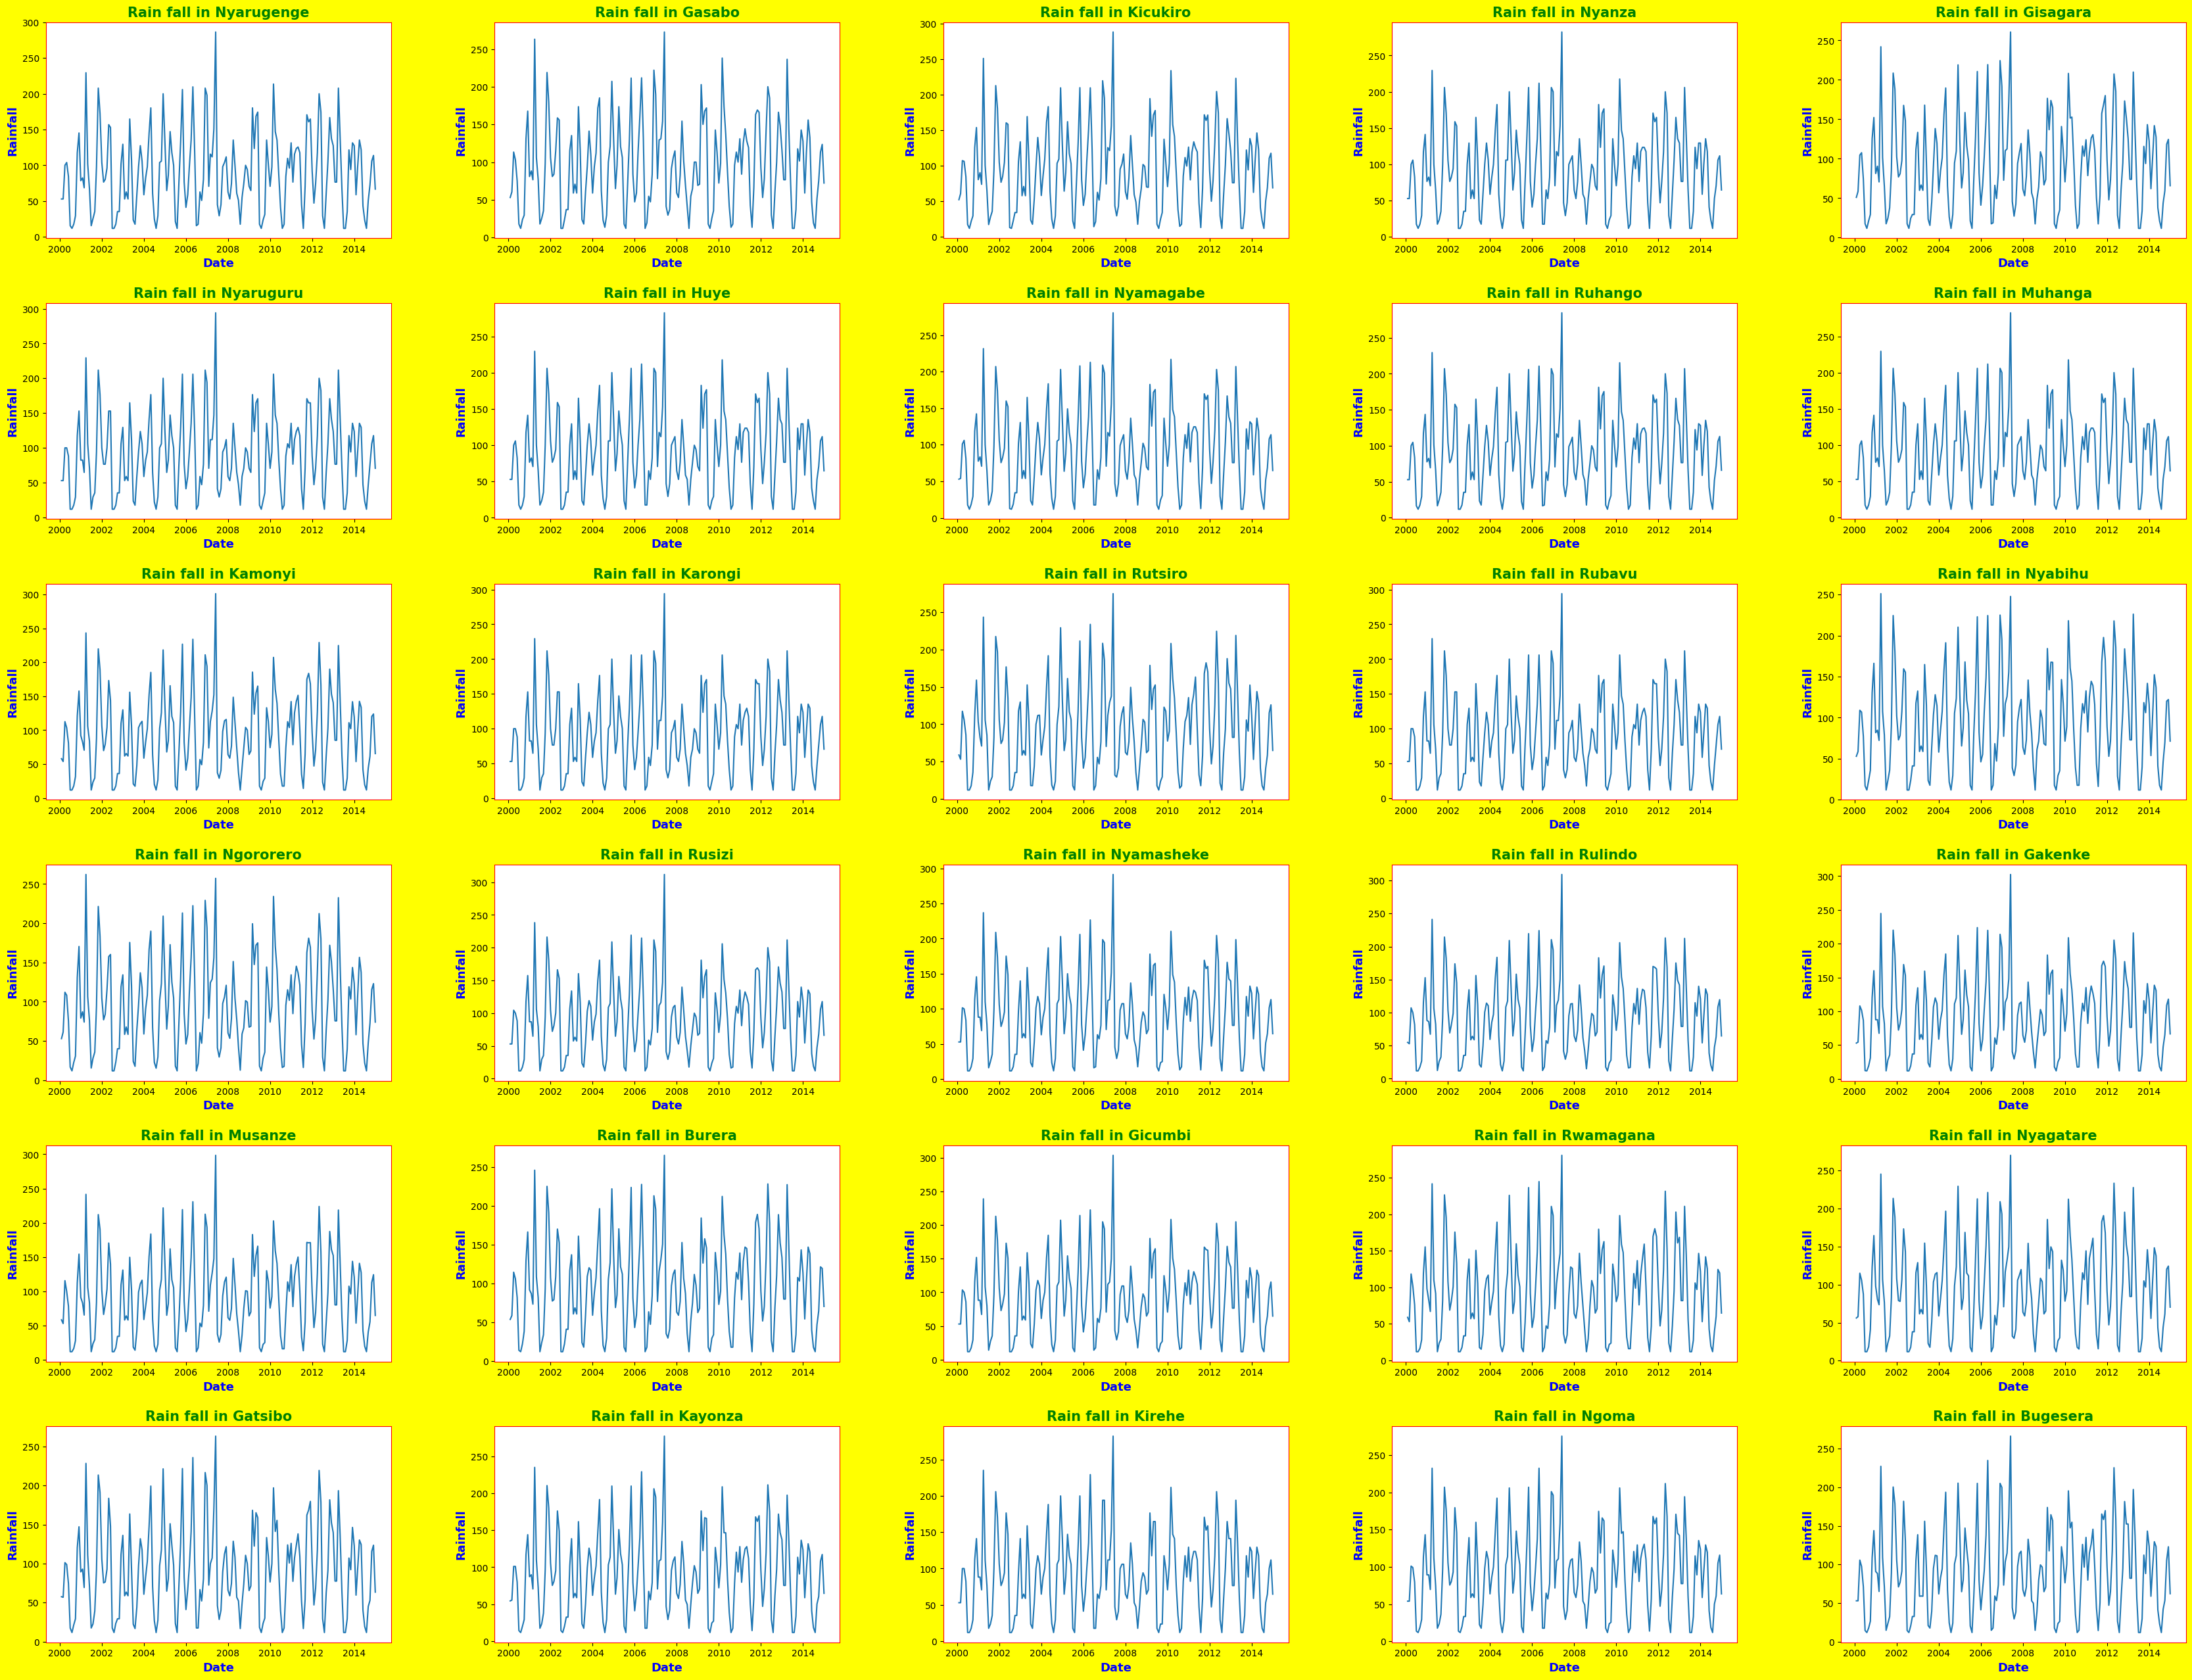

In [2067]:
# PLOTTING THE 6X5 SUBPLOTS FOR RAINFALL FOR EACH DISTRICT IN RWANDA
figure, axes = plt.subplots(nrows=6, ncols=5, figsize=(42, 32))

# FIGURE PROPERTIES
plt.rcParams['figure.facecolor'] = 'yellow'
plt.rcParams['figure.edgecolor'] = 'red'

# SET MARGINS OF THE SUBPLOTS
plt.subplots_adjust(wspace=0.3, hspace=0.3)   

# SUBPLOT PROPERTIES
plt.rcParams['axes.edgecolor'] = 'red'
plt.rcParams['axes.facecolor'] = 'white'

for i, ax in enumerate(axes.flatten()):
    ax.plot(rainTranspose['Date'], rainTranspose.iloc[:, i+1])
    ax.set_title(
        f'Rain fall in {rainTranspose.iloc[:, i+1].name}', color='g', fontsize=15, fontweight='bold')
    ax.set_xlabel('Date', color='b', fontsize=13, fontweight='bold')
    ax.set_ylabel('Rainfall', color='b', fontsize=13, fontweight='bold')

In [2068]:
# SET THE INDEX OF THE TRANSPOSED DATASET TO THE MONTHS
vegetation = vegetation.set_index('District')

# TRANSPOSE THE DATASET FOR VEGETATION
vegTranspose = vegetation.T

# SHOW THE FIRST 5 ROWS OF THE TRANSPOSED DATASET
vegTranspose.head(7)


District  Nyarugenge      Gasabo    Kicukiro      Nyanza    Gisagara  \
JAN              NaN         NaN         NaN         NaN         NaN   
FEB              NaN         NaN         NaN         NaN         NaN   
MAR              NaN         NaN         NaN         NaN         NaN   
APR              NaN         NaN         NaN         NaN         NaN   
MAY       127.133558  134.274365  127.197642  130.407565  124.877629   
JUN       114.194658  121.746863  112.709287  115.476082  113.087827   
JUL        97.707394  101.761017   95.870810  100.632357  100.303528   

District   Nyaruguru        Huye   Nyamagabe     Ruhango     Muhanga  ...  \
JAN              NaN         NaN         NaN         NaN         NaN  ...   
FEB              NaN         NaN         NaN         NaN         NaN  ...   
MAR              NaN         NaN         NaN         NaN         NaN  ...   
APR              NaN         NaN         NaN         NaN         NaN  ...   
MAY       129.622365  126.361863  128.071805  132.441846  131.445190  ...   
JUN       122.600696  113.875243  122.726689  117.984585  119.228925  ...   
JUL       111.281785   97.991159  109.524208  102.560488  106.294952  ...   

District     Musanze      Burera     Gicumbi   Rwamagana   Nyagatare  \
JAN              NaN         NaN         NaN         NaN         NaN   
FEB              NaN         NaN         NaN         NaN         NaN   
MAR              NaN         NaN         NaN         NaN         NaN   
APR              NaN         NaN         NaN         NaN         NaN   
MAY       135.714897  134.276864  137.636419  122.238514  125.553883   
JUN       131.593790  125.365627  125.461895  109.231011  107.895170   
JUL       116.513982  104.960831  105.881359   92.472676   89.554987   

District     Gatsibo     Kayonza      Kirehe       Ngoma    Bugesera  
JAN              NaN         NaN         NaN         NaN         NaN  
FEB              NaN         NaN         NaN         NaN         NaN  
MAR              NaN         NaN         NaN         NaN         NaN  
APR              NaN         NaN         NaN         NaN         NaN  
MAY       125.890110  113.814089  110.627623  129.789072  108.315401  
JUN       110.811168   98.268054   95.024470  115.142145   96.147592  
JUL        92.524644   84.752643   83.192432   98.026140   86.140547  

[7 rows x 30 columns]

In [2069]:
# ADD THE DATE RANGE TO THE TRANSPOSED DATASET AS A COLUMN CALLED 'Date'
vegTranspose = vegTranspose.reset_index()
vegTranspose['Date'] = dateRange

# SET THE INDEX OF THE TRANSPOSED DATASET TO THE DATE
vegTranspose = vegTranspose.set_index('Date')

# DROP NAN VALUES FROM THE DATASET
vegTranspose = vegTranspose.dropna()

# VIEW THE FIRST 5 ROWS OF THE DATASET
vegTranspose.head()


District   index  Nyarugenge      Gasabo    Kicukiro      Nyanza    Gisagara  \
Date                                                                           
2000-05-31   MAY  127.133558  134.274365  127.197642  130.407565  124.877629   
2000-06-30   JUN  114.194658  121.746863  112.709287  115.476082  113.087827   
2000-07-31   JUL   97.707394  101.761017   95.870810  100.632357  100.303528   
2000-08-31   AUG   95.699328   96.821079   93.065278   95.565559   97.353433   
2000-09-30   SEP   88.729965   89.282895   86.075767   92.335410   94.047278   

District     Nyaruguru        Huye   Nyamagabe     Ruhango  ...     Musanze  \
Date                                                        ...               
2000-05-31  129.622365  126.361863  128.071805  132.441846  ...  135.714897   
2000-06-30  122.600696  113.875243  122.726689  117.984585  ...  131.593790   
2000-07-31  111.281785   97.991159  109.524208  102.560488  ...  116.513982   
2000-08-31  102.560603   93.189050  101.471406   97.984329  ...  104.174068   
2000-09-30  104.060466   92.265781  101.832852   93.234306  ...  107.802326   

District        Burera     Gicumbi   Rwamagana   Nyagatare     Gatsibo  \
Date                                                                     
2000-05-31  134.276864  137.636419  122.238514  125.553883  125.890110   
2000-06-30  125.365627  125.461895  109.231011  107.895170  110.811168   
2000-07-31  104.960831  105.881359   92.472676   89.554987   92.524644   
2000-08-31   94.979543   98.562634   88.590049   83.901664   88.723776   
2000-09-30   92.243931   93.914034   83.392169   80.959234   84.875235   

District       Kayonza      Kirehe       Ngoma    Bugesera  
Date                                                        
2000-05-31  113.814089  110.627623  129.789072  108.315401  
2000-06-30   98.268054   95.024470  115.142145   96.147592  
2000-07-31   84.752643   83.192432   98.026140   86.140547  
2000-08-31   82.719604   80.193407   93.709170   83.356638  
2000-09-30   80.866587   78.962225   88.514729   80.818187  

[5 rows x 31 columns]

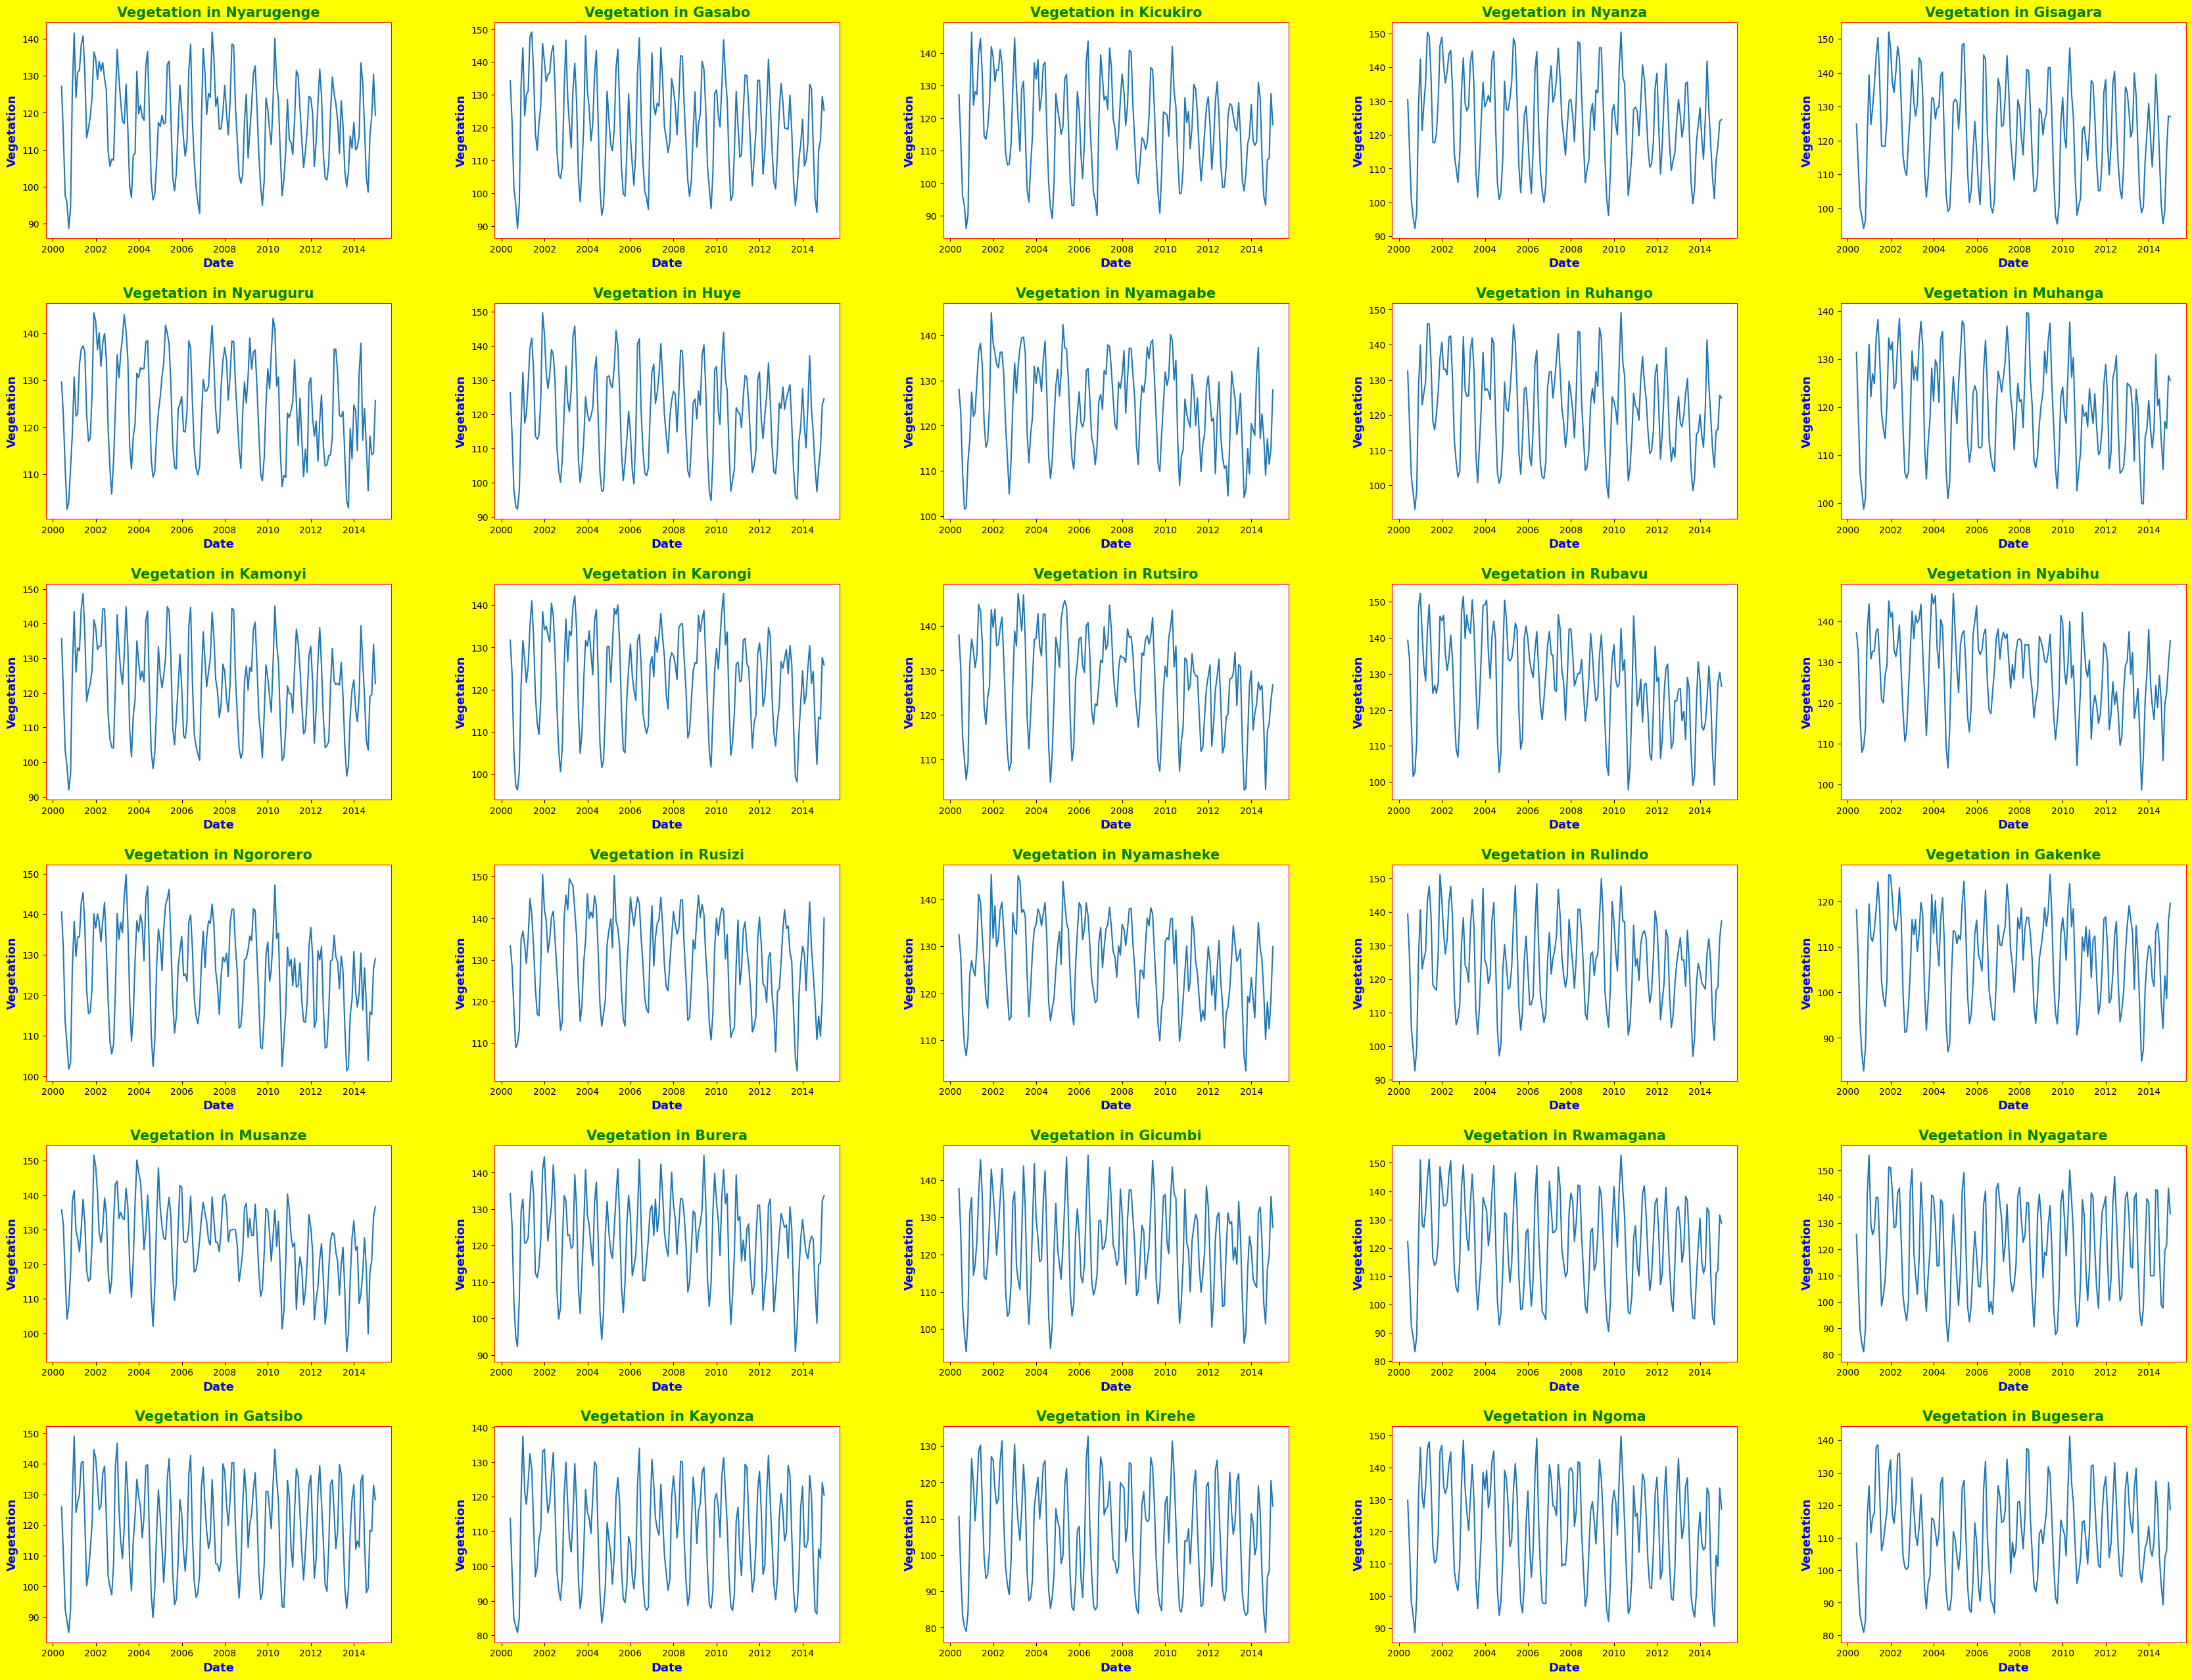

In [2070]:
# PLOTTING THE 6X5 SUBPLOTS FOR VEGETATION FOR EACH DISTRICT IN RWANDA
figure, axes = plt.subplots(nrows=6, ncols=5, figsize=(42, 32))

# FIGURE PROPERTIES
plt.rcParams['figure.facecolor'] = 'yellow'
plt.rcParams['figure.edgecolor'] = 'red'

# SET MARGINS OF THE SUBPLOTS
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# SUBPLOT PROPERTIES
plt.rcParams['axes.edgecolor'] = 'red'
plt.rcParams['axes.facecolor'] = 'white'

for i, ax in enumerate(axes.flatten()):
    ax.plot(vegTranspose.index, vegTranspose.iloc[:, i+1])
    ax.set_title(
        f'Vegetation in {vegTranspose.iloc[:, i+1].name}', color='g', fontsize=15, fontweight='bold')
    ax.set_xlabel('Date', color='b', fontsize=13, fontweight='bold')
    ax.set_ylabel('Vegetation', color='b', fontsize=13, fontweight='bold')


#### QUESTION 3

In [2071]:
# MEAN CALCULATION FOR RAINFALL
meanRainFall = rainTranspose.groupby(rainTranspose.Date.dt.month).mean().mean(axis=1)

# MEDIAN CALCULATION FOR RAINFALL
medRain = rainTranspose.groupby(rainTranspose.Date.dt.month).median().median(axis=1)

# CALCULATING THE MINIMUM FOR RAINFALL
minRain = rainTranspose.groupby(rainTranspose.Date.dt.month).min().min(axis=1)

# CALCULATING THE MAXIMUM FOR RAINFALL
maxRain = rainTranspose.groupby(rainTranspose.Date.dt.month).max().max(axis=1)

# CREATE A NEW DATAFRAME TO HOLD THE MEAN, MEDIAN, MINIMUM AND MAXIMUM
statsDF = pd.DataFrame()

# ADD THE MEAN, MEDIAN, MINIMUM AND MAXIMUM TO THE DATAFRAME
statsDF['Mean'] = meanRainFall
statsDF['Median'] = medRain
statsDF['Minimum'] = minRain
statsDF['Maximum'] = maxRain

# DISPLAY THE DATAFRAME
statsDF.reset_index(inplace=True)

# DROP Date COLUMN
statsDF.drop('Date', axis=1, inplace=True)
statsDF

Mean  Median  Minimum  Maximum
0    69.083333   68.70     46.9    105.9
1   100.239778   86.50     52.9    238.4
2   139.459333  135.30     52.9    263.5
3   148.915556  141.20     97.4    244.7
4   112.469111  100.65     36.2    311.8
5    24.529333   20.30     11.8     52.9
6    15.152667   11.80     11.8     29.4
7    41.829778   41.20     14.7     80.9
8    85.049111   94.10     23.5    182.7
9   126.871111  114.05     29.4    236.5
10  135.926667  117.60     76.5    229.4
11  100.438444   94.10     41.2    200.0

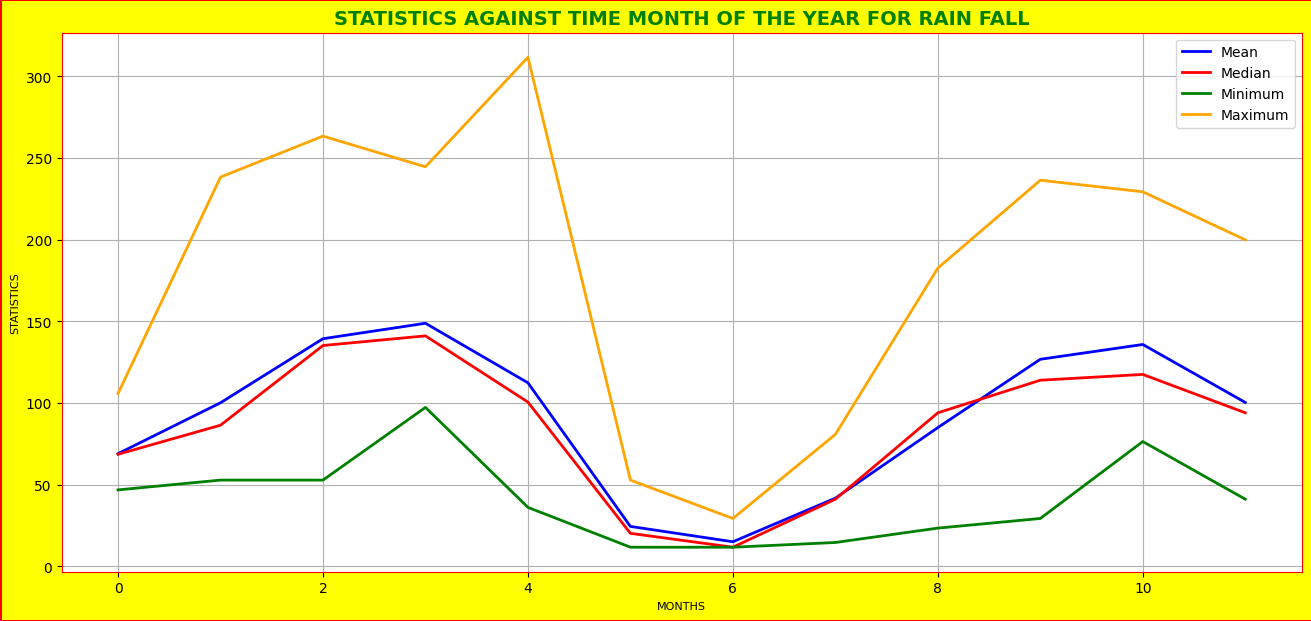

In [2072]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize = (16, 7), edgecolor = "red", facecolor = "yellow", linewidth = 1)
plt.xlabel("MONTHS", color = "black", fontsize = 8)
plt.ylabel("STATISTICS", color = "black", fontsize = 8)
plt.title("STATISTICS AGAINST TIME MONTH OF THE YEAR FOR RAIN FALL", color = "green", fontsize = 14, fontweight = "bold")

# PLOTTING THE GRAPH
plt.plot(statsDF.index, statsDF['Mean'], color = "blue", linewidth = 2, label = "Mean")
plt.plot(statsDF.index, statsDF['Median'], color = "red", linewidth = 2, label = "Median")
plt.plot(statsDF.index, statsDF['Minimum'], color = "green", linewidth = 2, label = "Minimum")
plt.plot(statsDF.index, statsDF['Maximum'], color = "orange", linewidth = 2, label = "Maximum")

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()


In [2073]:
# MEAN CALCULATION FOR VEGETATION
meanVeg = vegTranspose.groupby(vegTranspose.index.month).mean().mean(axis=1)

# MEDIAN CALCULATION FOR VEGETATION
medVeg = vegTranspose.groupby(vegTranspose.index.month).median().median(axis=1)

# CALCULATING THE MINIMUM FOR VEGETATION
minVeg = vegTranspose.groupby(vegTranspose.index.month).min().min(axis=1)

# CALCULATING THE MAXIMUM FOR VEGETATION
maxVeg = vegTranspose.groupby(vegTranspose.index.month).max().max(axis=1)

# CREATE A NEW DATAFRAME TO HOLD THE MEAN, MEDIAN, MINIMUM AND MAXIMUM
statsVegDF = pd.DataFrame()

# ADD THE MEAN, MEDIAN, MINIMUM AND MAXIMUM TO THE DATAFRAME
statsVegDF['Mean'] = meanVeg
statsVegDF['Median'] = medVeg
statsVegDF['Minimum'] = minVeg
statsVegDF['Maximum'] = maxVeg

# DISPLAY THE DATAFRAME
statsVegDF.reset_index(inplace=True)

# DROP Date COLUMN
statsVegDF.drop('Date', axis=1, inplace=True)
statsVegDF

Mean      Median     Minimum     Maximum
0   124.140874  123.987221   93.649422  150.495856
1   120.469059  121.296982   88.375662  149.525034
2   124.236352  125.807144   98.306588  150.224410
3   133.260526  136.536959  100.691685  152.635095
4   135.315459  138.384247  108.315401  151.328737
5   125.576479  127.417296   95.024470  143.043877
6   110.991302  111.805282   83.192432  130.992456
7   103.655364  103.049909   78.661577  129.470863
8   105.528631  106.236392   78.962225  126.923562
9   113.553146  114.049997   84.074041  139.933869
10  128.385639  128.324193   98.071576  152.008141
11  130.453648  130.134722  103.750315  155.625355

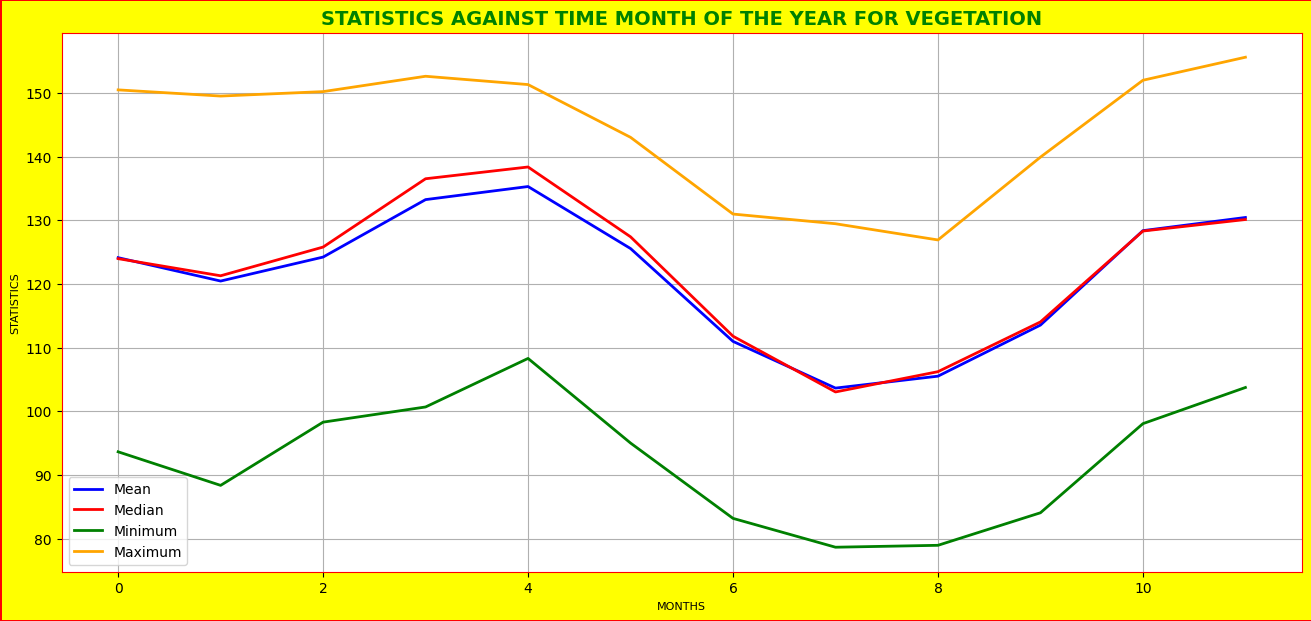

In [2074]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("MONTHS", color="black", fontsize=8)
plt.ylabel("STATISTICS", color="black", fontsize=8)
plt.title("STATISTICS AGAINST TIME MONTH OF THE YEAR FOR VEGETATION",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH
plt.plot(statsVegDF.index, statsVegDF['Mean'],
         color="blue", linewidth=2, label="Mean")
plt.plot(statsVegDF.index, statsVegDF['Median'],
         color="red", linewidth=2, label="Median")
plt.plot(statsVegDF.index, statsVegDF['Minimum'],
         color="green", linewidth=2, label="Minimum")
plt.plot(statsVegDF.index, statsVegDF['Maximum'],
         color="orange", linewidth=2, label="Maximum")

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()

#### QUESTION 4 

In [2075]:
# Calculate the correlation coefficient, C, for rainfall between each pair of districts. 
# Make a graph to show the correlation values versus the distance, d, measured in km between the pair of districts.
# Fit a model of the form, C(d) = C0exp(-ad) by estimating C0 and the decay constant a. 
# Plot this curve on the graph to show how quickly the correlation declines with distance. 
# Also provide your estimate of C0 and the decay constant a.

# LOADING THE CENTROID DATA FOR THE DISTRICTS
centroids = pd.read_csv("RwandaDistrictCentroidsLongitude_Latitude.csv")

# DISPLAYING THE DATA
centroids.head()

wkt_geom  Prov_ID  \
0  POINT(30.44539187624978283 -1.61907593351633294)        5   
1   POINT(29.72272538213003301 -1.9548907110369993)        2   
2  POINT(30.11387116565671107 -1.62157664604772656)        4   
3  POINT(30.14372498206437356 -2.00886367940993305)        1   
4  POINT(29.98722685498238505 -1.73928358683540596)        4   

            Province  Dist_ID  District  Longitude  Latitude  
0   Eastern Province       53   Gatsibo  30.445392  1.619076  
1  Southern Province       27   Muhanga  29.722725  1.954891  
2  Northern Province       45   Gicumbi  30.113871  1.621577  
3        Kigali City       13  Kicukiro  30.143725  2.008864  
4  Northern Province       41   Rulindo  29.987227  1.739284

In [2076]:
# MAKE THE DISTRICT NAME THE INDEX
centroids = centroids.set_index('District', drop=True)

# RAIN DATA WITHOUT DATE COLUMN
rain = rainTranspose.drop(['Date'], axis=1)

# DISPLAY THE DATA
rain.head()

Month  Nyarugenge  Gasabo  Kicukiro  Nyanza  Gisagara  Nyaruguru   Huye  \
JAN          52.9    52.9      52.2    52.9      51.1       52.9   52.9   
FEB          52.9    60.4      60.8    52.9      58.8       52.9   52.9   
MAR         100.0   113.3     107.1   100.0     104.6      100.0  100.0   
APR         103.9   103.1     106.1   105.9     107.7      100.0  105.9   
MAY          84.4    74.9      84.6    82.4      74.4       88.2   82.4   

Month  Nyamagabe  Ruhango  Muhanga  ...  Musanze  Burera  Gicumbi  Rwamagana  \
JAN         52.9     52.9     52.9  ...     58.3    53.4     52.9       58.8   
FEB         53.9     52.9     52.9  ...     52.9    58.4     52.9       52.9   
MAR        101.0    100.0    100.0  ...    115.5   114.2    103.5      118.2   
APR        105.9    104.7    105.9  ...     99.9   105.9    100.0      101.6   
MAY         81.4     83.5     82.4  ...     78.3    81.6     85.9       75.9   

Month  Nyagatare  Gatsibo  Kayonza  Kirehe  Ngoma  Bugesera  
JAN         56.1     57.6     54.5    52.9   53.9      52.9  
FEB         58.0     56.9     55.6    52.9   53.9      52.9  
MAR        115.0    101.2    101.1   100.0  101.0     105.6  
APR        105.9     98.8    101.1   100.0   99.0      97.4  
MAY         87.4     74.5     79.7    82.4   79.4      71.2  

[5 rows x 30 columns]

Haversine =  34.693078998302425


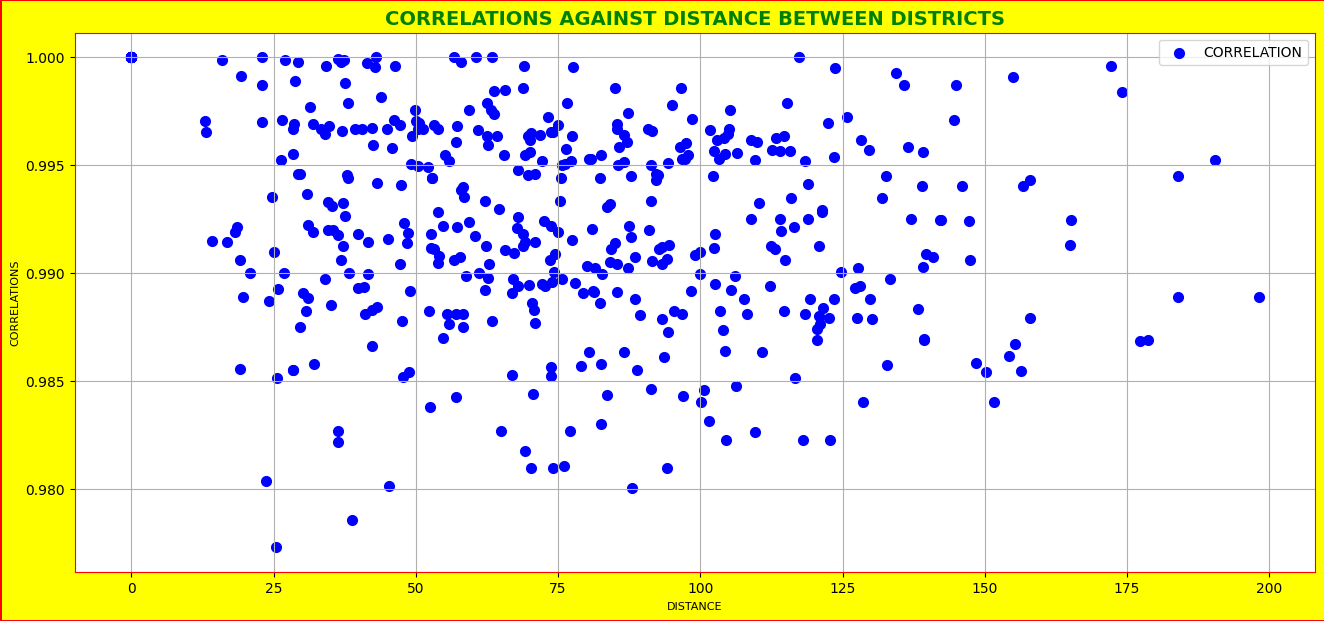

In [2077]:
districts = rain.columns # LIST OF DISTRICTS
correlations = []  # LIST TO STORE THE CORRELATION VALUES
distances = []  # LIST TO STORE THE DISTANCE VALUES

# CALCULATING THE CORRELATION AND DISTANCE BETWEEN EACH DISTRICT
for i in range(0, (len(districts)-1)):

    longDistrict1 = centroids.loc[districts[i]]["Longitude"] # LONGITUDE OF DISTRICT 1
    latDistrict1 = centroids.loc[districts[i]]["Latitude"] # LATITUDE OF DISTRICT 1

    # CALCULATING THE CORRELATION AND DISTANCE BETWEEN DISTRICT 1 AND DISTRICT 2
    for j in range(i, len(districts)):
        corrRain = rain[districts[i]].corr(rain[districts[j]]) # CALCULATING THE CORRELATION
        correlations.append(corrRain) # APPENDING THE CORRELATION TO THE LIST

        longDistrict2 = centroids.loc[districts[j]]["Longitude"] # LONGITUDE OF DISTRICT 2
        latDistrict2 = centroids.loc[districts[j]]["Latitude"] # LATITUDE OF DISTRICT 2

        # CALCULATING THE DISTANCE BETWEEN DISTRICT 1 AND DISTRICT 2
        distance = haversine((latDistrict1, longDistrict1), (latDistrict2, longDistrict2))
        distances.append(distance) # APPENDING THE DISTANCE TO THE LIST

print("Haversine = ", haversine(
    (latDistrict1, longDistrict1), (latDistrict2, longDistrict2)))
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("DISTANCE", color="black", fontsize=8)
plt.ylabel("CORRELATIONS", color="black", fontsize=8)
plt.title("CORRELATIONS AGAINST DISTANCE BETWEEN DISTRICTS",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING THE GRAPH AS A SCATTER PLOT
plt.scatter(distances, correlations, color="blue", linewidth=2, label="CORRELATION")

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()

#### QUESTION 5

In [2078]:
# ROWS COUNT OF THE DATAFRAME
vegTranspose.shape[0]

176

In [2079]:
# NUMBER OF ROWS COUNT FOR THE RAINFALL DATA SET
rainTranspose.shape[0]

180

In [2080]:
# SYNCHRONIZING THE RAINFALL DATA SET WITH THE VEGETATION DATA SET
# REMOVE THE FIRST FOUR ROWS FROM THE RAIN FALL DATA SET TO MATCH WITH THE VEGETATION DATA SET - START WITH MAY 2000
rainSync = rainTranspose.iloc[4:]

# REMOVE THE INDEX COLUMN FROM THE RAIN FALL DATA SET
rainSync = rainSync.reset_index()

# DELETE THE INDEX COLUMN FROM THE RAIN FALL DATA SET
rainSync = rainSync.drop(["index"], axis=1)
vegTranspose = vegTranspose.drop(["index"], axis=1)

# DISPLAY THE FIRST ROW OF THE RAIN FALL DATA SET
rainSync.head()

Month       Date  Nyarugenge  Gasabo  Kicukiro  Nyanza  Gisagara  Nyaruguru  \
0     2000-05-31        84.4    74.9      84.6    82.4      74.4       88.2   
1     2000-06-30        15.6    17.6      17.2    17.6      17.6       11.8   
2     2000-07-31        11.8    11.8      11.8    11.8      11.8       11.8   
3     2000-08-31        17.6    23.5      21.8    17.6      21.4       17.6   
4     2000-09-30        29.4    29.4      29.4    29.4      29.4       29.4   

Month  Huye  Nyamagabe  Ruhango  ...  Musanze  Burera  Gicumbi  Rwamagana  \
0      82.4       81.4     83.5  ...     78.3    81.6     85.9       75.9   
1      17.6       17.6     16.5  ...     11.8    13.6     11.8       11.8   
2      11.8       11.8     11.8  ...     11.8    11.8     11.8       11.8   
3      17.6       18.6     17.6  ...     16.5    22.0     17.6       16.4   
4      29.4       29.4     29.4  ...     28.0    38.2     29.4       28.2   

Month  Nyagatare  Gatsibo  Kayonza  Kirehe  Ngoma  Bugesera  
0           87.4     74.5     79.7    82.4   79.4      71.2  
1           11.8     17.6     14.4    11.8   13.7      14.4  
2           11.8     11.8     11.8    11.8   11.8      11.8  
3           18.3     21.6     20.3    17.6   18.6      17.6  
4           41.0     29.4     29.4    29.4   29.4      26.5  

[5 rows x 31 columns]

In [2081]:
# SET THE DATE AS THE INDEX FOR THE RAIN FALL DATA SET
rainSync.set_index("Date", inplace=True)
vegTranspose.head()

District    Nyarugenge      Gasabo    Kicukiro      Nyanza    Gisagara  \
Date                                                                     
2000-05-31  127.133558  134.274365  127.197642  130.407565  124.877629   
2000-06-30  114.194658  121.746863  112.709287  115.476082  113.087827   
2000-07-31   97.707394  101.761017   95.870810  100.632357  100.303528   
2000-08-31   95.699328   96.821079   93.065278   95.565559   97.353433   
2000-09-30   88.729965   89.282895   86.075767   92.335410   94.047278   

District     Nyaruguru        Huye   Nyamagabe     Ruhango     Muhanga  ...  \
Date                                                                    ...   
2000-05-31  129.622365  126.361863  128.071805  132.441846  131.445190  ...   
2000-06-30  122.600696  113.875243  122.726689  117.984585  119.228925  ...   
2000-07-31  111.281785   97.991159  109.524208  102.560488  106.294952  ...   
2000-08-31  102.560603   93.189050  101.471406   97.984329  102.542930  ...   
2000-09-30  104.060466   92.265781  101.832852   93.234306   98.709076  ...   

District       Musanze      Burera     Gicumbi   Rwamagana   Nyagatare  \
Date                                                                     
2000-05-31  135.714897  134.276864  137.636419  122.238514  125.553883   
2000-06-30  131.593790  125.365627  125.461895  109.231011  107.895170   
2000-07-31  116.513982  104.960831  105.881359   92.472676   89.554987   
2000-08-31  104.174068   94.979543   98.562634   88.590049   83.901664   
2000-09-30  107.802326   92.243931   93.914034   83.392169   80.959234   

District       Gatsibo     Kayonza      Kirehe       Ngoma    Bugesera  
Date                                                                    
2000-05-31  125.890110  113.814089  110.627623  129.789072  108.315401  
2000-06-30  110.811168   98.268054   95.024470  115.142145   96.147592  
2000-07-31   92.524644   84.752643   83.192432   98.026140   86.140547  
2000-08-31   88.723776   82.719604   80.193407   93.709170   83.356638  
2000-09-30   84.875235   80.866587   78.962225   88.514729   80.818187  

[5 rows x 30 columns]

In [2082]:
# VIEW THE VEG DATA SET
vegTranspose.head()

District    Nyarugenge      Gasabo    Kicukiro      Nyanza    Gisagara  \
Date                                                                     
2000-05-31  127.133558  134.274365  127.197642  130.407565  124.877629   
2000-06-30  114.194658  121.746863  112.709287  115.476082  113.087827   
2000-07-31   97.707394  101.761017   95.870810  100.632357  100.303528   
2000-08-31   95.699328   96.821079   93.065278   95.565559   97.353433   
2000-09-30   88.729965   89.282895   86.075767   92.335410   94.047278   

District     Nyaruguru        Huye   Nyamagabe     Ruhango     Muhanga  ...  \
Date                                                                    ...   
2000-05-31  129.622365  126.361863  128.071805  132.441846  131.445190  ...   
2000-06-30  122.600696  113.875243  122.726689  117.984585  119.228925  ...   
2000-07-31  111.281785   97.991159  109.524208  102.560488  106.294952  ...   
2000-08-31  102.560603   93.189050  101.471406   97.984329  102.542930  ...   
2000-09-30  104.060466   92.265781  101.832852   93.234306   98.709076  ...   

District       Musanze      Burera     Gicumbi   Rwamagana   Nyagatare  \
Date                                                                     
2000-05-31  135.714897  134.276864  137.636419  122.238514  125.553883   
2000-06-30  131.593790  125.365627  125.461895  109.231011  107.895170   
2000-07-31  116.513982  104.960831  105.881359   92.472676   89.554987   
2000-08-31  104.174068   94.979543   98.562634   88.590049   83.901664   
2000-09-30  107.802326   92.243931   93.914034   83.392169   80.959234   

District       Gatsibo     Kayonza      Kirehe       Ngoma    Bugesera  
Date                                                                    
2000-05-31  125.890110  113.814089  110.627623  129.789072  108.315401  
2000-06-30  110.811168   98.268054   95.024470  115.142145   96.147592  
2000-07-31   92.524644   84.752643   83.192432   98.026140   86.140547  
2000-08-31   88.723776   82.719604   80.193407   93.709170   83.356638  
2000-09-30   84.875235   80.866587   78.962225   88.514729   80.818187  

[5 rows x 30 columns]

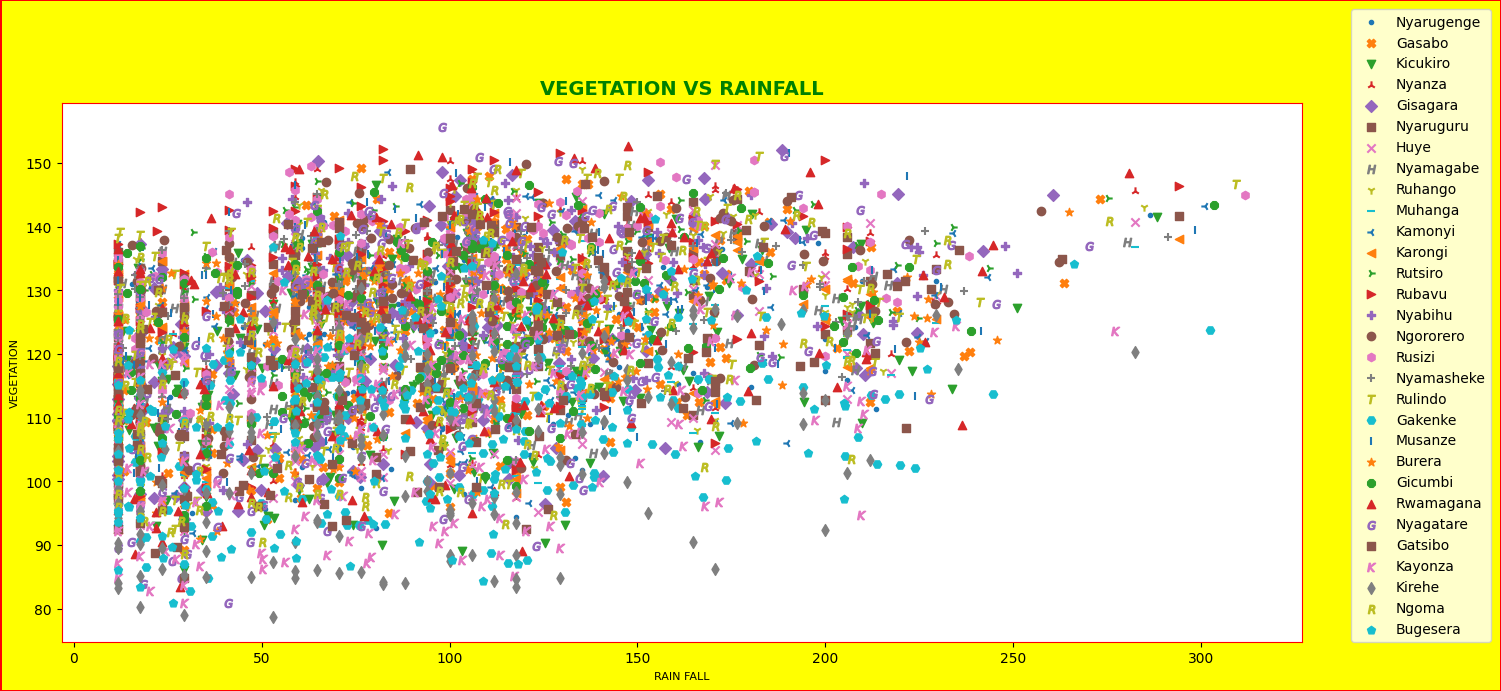

In [2083]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 7), edgecolor='red', facecolor='yellow', linewidth=1)
plt.xlabel('RAIN FALL', color='black', fontsize=8)
plt.ylabel('VEGETATION', color='black', fontsize=8)
plt.title('VEGETATION VS RAINFALL',
          color='green', fontsize=14, fontweight='bold')

# MARKERS FOR THE SCATTER PLOT GRAPH - TO SHOW THE DIFFERENT VEGETATION TYPES
markers = ['.', 'X', 'v', '2', 'D', 's', 'x', '$H$', '1', '_', '3', '<', '4', '>', 'P', 'o',
           'h', '+', '$T$', 'H', '|',  '*', '8', '^',   '$G$', ',', '$K$', 'd', '$R$', 'p']
for i, j, k in zip(vegTranspose.columns, rainSync.columns, markers):
    plt.scatter(rainSync[j], vegTranspose[i], label=i, marker=k)
    
    # ADDING THE LEGEND TO CORRESPOND TO THE MARKERS
    plt.legend(bbox_to_anchor=(1.04,0), loc='lower left', borderaxespad=0) 

#### QUESTION 6

In [2084]:
# DELAYING RAIN FALL TIME SERIES BY K[0:12] MONTHS
delayedRainFall = []
corrVegRain = []

# CALCULATING THE CORRELATION BETWEEN THE VEGETATION AND RAINFALL DATA SETS
for i in np.arange(0, 13):
    # SHIFTING COLUMNS BY K[0:12] MONTHS TO DELAY THE RAINFALL TIME SERIES
    delRain = rainSync.shift(i)
    
    # REMOVING THE NAN VALUES FROM THE DELAYED RAINFALL TIME SERIES
    rainDel = delRain.dropna()

    # APPENDING THE DELAYED RAINFALL TIME SERIES TO THE LIST OF DELAYED RAINFALL TIME SERIES
    delayedRainFall.append(rainDel)

    # CALCULATING THE CORRELATION BETWEEN THE VEGETATION AND RAINFALL DATA SETS
    for i, j in zip(rainDel.columns, vegTranspose.columns):
        # CALCULATING THE CORRELATION
        a = rainDel[i].corr(vegTranspose[j])
        
        # APPENDING THE CORRELATION TO THE LIST
        corrVegRain.append(a)
        
# CONVERTING THE CORRELATION LIST TO A NUMPY ARRAY
corrVegRainArr = np.reshape(corrVegRain, (13, 30))  # 13 ROWS AND 30 COLUMNS

# CONVERTING THE CORRELATION ARRAY TO A DATAFRAME
vegRainCorr = pd.DataFrame(corrVegRainArr)

# SETTING THE COLUMN NAMES OF THE DATAFRAME
vegRainCorr.columns = vegTranspose.columns
vegRainCorr


District  Nyarugenge    Gasabo  Kicukiro    Nyanza  Gisagara  Nyaruguru  \
0           0.345469  0.364914  0.368110  0.422077  0.421503   0.328468   
1           0.699402  0.744743  0.712029  0.741149  0.757912   0.570606   
2           0.523791  0.563201  0.548254  0.538423  0.549202   0.473862   
3           0.109814  0.085214  0.109537  0.084458  0.068323   0.176890   
4          -0.247282 -0.313730 -0.276333 -0.261706 -0.279982  -0.105633   
5          -0.306657 -0.369074 -0.348451 -0.279943 -0.297438  -0.256072   
6          -0.097233 -0.077595 -0.146507 -0.069501 -0.071389  -0.200661   
7           0.100684  0.127715  0.056583  0.067726  0.064119  -0.116735   
8          -0.013068  0.025852 -0.011051 -0.096089 -0.082238  -0.192031   
9          -0.244022 -0.261749 -0.225484 -0.366327 -0.364397  -0.271416   
10         -0.404423 -0.448700 -0.375025 -0.431882 -0.455574  -0.271776   
11         -0.183227 -0.213364 -0.130704 -0.138384 -0.160258  -0.063410   
12          0.237558  0.267851  0.283766  0.313306  0.329854   0.245876   

District      Huye  Nyamagabe   Ruhango   Muhanga  ...   Musanze    Burera  \
0         0.404645   0.279626  0.418898  0.298986  ...  0.266694  0.332027   
1         0.739766   0.549212  0.718812  0.649262  ...  0.549926  0.720445   
2         0.557895   0.504701  0.520446  0.564153  ...  0.430063  0.553618   
3         0.115360   0.236541  0.069481  0.165845  ... -0.031905  0.018559   
4        -0.243080  -0.076024 -0.259544 -0.208325  ... -0.501392 -0.446252   
5        -0.294970  -0.254963 -0.272780 -0.310558  ... -0.551920 -0.431214   
6        -0.104556  -0.216190 -0.045435 -0.145326  ... -0.223640 -0.036905   
7         0.050223  -0.124625  0.078444  0.028983  ...  0.110270  0.235156   
8        -0.063843  -0.145575 -0.112815 -0.058308  ...  0.147377  0.123584   
9        -0.327701  -0.280949 -0.396447 -0.291425  ... -0.071063 -0.212921   
10       -0.426054  -0.300910 -0.478671 -0.419108  ... -0.232089 -0.419700   
11       -0.154094  -0.135548 -0.154014 -0.226561  ... -0.124262 -0.213538   
12        0.294130   0.180385  0.303626  0.171521  ...  0.205799  0.271336   

District   Gicumbi  Rwamagana  Nyagatare   Gatsibo   Kayonza    Kirehe  \
0         0.363082   0.380000   0.474722  0.468495  0.406614  0.384355   
1         0.724403   0.763170   0.762040  0.775554  0.755080  0.721771   
2         0.512861   0.564680   0.465238  0.456312  0.533098  0.582355   
3        -0.011951   0.066491  -0.107831 -0.097983  0.036044  0.127367   
4        -0.400914  -0.316404  -0.502820 -0.471000 -0.358444 -0.266303   
5        -0.337213  -0.337827  -0.426787 -0.393428 -0.398714 -0.368179   
6         0.083547  -0.058714  -0.020800  0.001516 -0.120364 -0.170506   
7         0.330182   0.141369   0.252716  0.224835  0.113510  0.048155   
8         0.108962   0.023543   0.115451  0.038495  0.024636 -0.001539   
9        -0.315518  -0.304979  -0.220708 -0.321557 -0.272090 -0.268685   
10       -0.514661  -0.477547  -0.425459 -0.485295 -0.439511 -0.424745   
11       -0.262880  -0.233327  -0.182606 -0.174250 -0.179914 -0.162621   
12        0.259062   0.286748   0.375024  0.398070  0.310134  0.303419   

District     Ngoma  Bugesera  
0         0.398624  0.406135  
1         0.758189  0.759051  
2         0.565956  0.523172  
3         0.071220  0.071889  
4        -0.344003 -0.249635  
5        -0.407192 -0.221549  
6        -0.160765  0.013752  
7         0.075875  0.146278  
8         0.018553 -0.014436  
9        -0.242558 -0.317199  
10       -0.407342 -0.468071  
11       -0.158845 -0.185939  
12        0.317334  0.316442  

[13 rows x 30 columns]

#### QUESTION 7

In [2085]:
SMA = [] # LIST TO STORE THE SIMPLE MOVING AVERAGE OF THE RAINFALL DATA SET
correlations = [] # LIST TO STORE THE CORRELATIONS BETWEEN THE VEGETATION AND RAINFALL DATA SETS

window = np.arange(1, 13) # WINDOW SIZE OF 1 TO 12 MONTHS
cols = np.arange(0, 30) # COLUMN NUMBER OF THE VEGETATION DATA SET

# CALCULATING THE CORRELATION BETWEEN THE VEGETATION AND RAINFALL DATA SETS
for n, j in zip(rainSync.columns,cols):
        
        # CALCULATING THE SIMPLE MOVING AVERAGE OF THE RAINFALL DATA SET
        for t in window:
                # CALCULATING THE SIMPLE MOVING AVERAGE
                windows = rainSync[n].rolling(t)
                
                # CALCULATING THE MEAN OF THE SIMPLE MOVING AVERAGE
                movAvgs = windows.mean()
                
                # REMOVING THE NAN VALUES FROM THE SIMPLE MOVING AVERAGE
                movAvgs = movAvgs.dropna()
                
                # DATA FOR EACH WINDOW SIZE
                vegWindow = vegTranspose.iloc[t-1: ,j]

                # CORRELATION BETWEEN THE VEGETATION AND RAINFALL 
                corrVeg = movAvgs.corr(vegWindow)
                
                # APPENDING THE CORRELATION TO THE LIST
                correlations.append(corrVeg)

# CONVERTING THE CORRELATION LIST TO A NUMPY ARRAY
correlationsVegRain = np.reshape(correlations, (30, 12))

# CONVERTING THE CORRELATION ARRAY TO A DATAFRAME
correlationsVegRainDF = pd.DataFrame(correlationsVegRain)

# TRANSPOSING THE DATAFRAME
corrsVegRainDF = correlationsVegRainDF.transpose()

# SET THE COLUMN NAMES OF THE DATAFRAME
corrsVegRainDF.columns = vegTranspose.columns

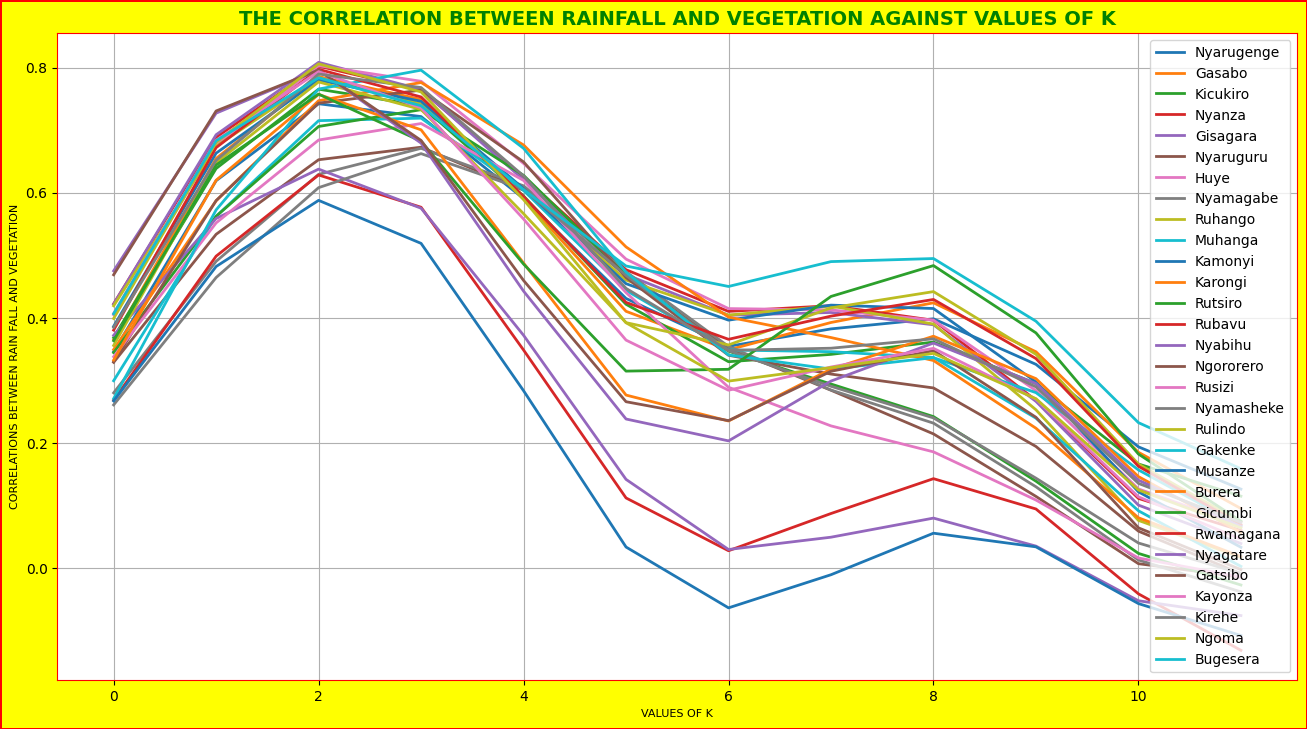

In [2086]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("VALUES OF K", color="black", fontsize=8)
plt.ylabel("CORRELATIONS BETWEEN RAIN FALL AND VEGETATION",
           color="black", fontsize=8)
plt.title("THE CORRELATION BETWEEN RAINFALL AND VEGETATION AGAINST VALUES OF K",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING THE CORRELATION BETWEEN THE VEGETATION AND RAINFALL DATA SETS
# AND ADDING THE LEGEND TO THE GRAPH 
plt.plot(corrsVegRainDF, linewidth=2, label=corrsVegRainDF.columns)

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()

#### QUESTION 8

#### RAIN FALL

In [2087]:
rainNP = rainSync.to_numpy() # CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
rain1D = rainNP.flatten() # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY 
rain1D # DISPLAYING THE 1D ARRAY

array([84.4, 74.9, 84.6, ..., 64.7, 63.7, 62.1])

In [2088]:
# VEGETATION
vegNP = vegTranspose.to_numpy()  # CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
veg1D = vegNP.flatten()  # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY
veg1D # DISPLAYING THE 1D ARRAY

array([127.1335578, 134.2743651, 127.1976424, ..., 113.4769123,
       127.0292248, 118.7343526])

In [2089]:
# LINEAR MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
modelRainVeg1 = np.polyfit(rain1D, veg1D, 1) # FITTING THE RAINFALL AND VEGETATION DATA SETS TO A LINEAR MODEL
modelRainVeg1 = np.poly1d(modelRainVeg1) # CONVERTING THE MODEL TO A POLYNOMIAL

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred1 = modelRainVeg1(rain1D)

# DISPLAYING THE PREDICTED VEGETATION VALUES
vegPred1

array([120.5914454 , 119.82369455, 120.60760857, ..., 118.9993726 ,
       118.91855672, 118.78925131])

In [2090]:
# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain1 = r2_score(veg1D, vegPred1)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain1 # DISPLAYING THE R-SQUARED VALUE

0.10945257623706128

In [2091]:
# QUADRATIC MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
modelRainVeg2 = np.polyfit(rain1D, veg1D, 2) # FITTING THE RAINFALL AND VEGETATION DATA SETS TO A QUADRATIC MODEL
modelRainVeg2 = np.poly1d(modelRainVeg2) # CONVERTING THE MODEL TO A POLYNOMIAL OF DEGREE 2

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred2 = modelRainVeg2(rain1D)

# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain2 = r2_score(veg1D, vegPred2)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain2  # DISPLAYING THE R-SQUARED VALUE

0.1161975165734146

In [2092]:
# CUBIC MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A CUBIC MODEL
modelRainVeg3 = np.polyfit(rain1D, veg1D, 3)
# CONVERTING THE MODEL TO A POLYNOMIAL OF DEGREE 3
modelRainVeg3 = np.poly1d(modelRainVeg3)

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred3 = modelRainVeg3(rain1D)

# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain3 = r2_score(veg1D, vegPred3)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain3  # DISPLAYING THE R-SQUARED VALUE


0.11897204790562577

##### DELAYED RAIN FALL

In [2093]:
delayedRainFall = rainSync.shift(1).dropna() # DELAYING THE RAINFALL DATA SET BY 1 MONTH

# REMOVING THE FIRST ROW OF THE VEGETATION DATA SET
delayedVeg = vegTranspose.iloc[1: , :]

In [2094]:
# RAIN FALL
rainNPdel = delayedRainFall.to_numpy()  # CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
rain1Ddelayed = rainNPdel.flatten()        # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY
rain1Ddelayed  # DISPLAYING THE 1D ARRAY

array([ 84.4,  74.9,  84.6, ..., 111.8, 115.7, 122.9])

In [2095]:
# VEGETATION
vegNPdel = delayedVeg.to_numpy()  # CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
veg1Ddelayed = vegNPdel.flatten()    # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY
veg1Ddelayed  # DISPLAYING THE 1D ARRAY

array([114.1946582, 121.7468629, 112.7092868, ..., 113.4769123,
       127.0292248, 118.7343526])

In [2096]:
# LINEAR MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A LINEAR MODEL
modelRainVeg1del = np.polyfit(rain1Ddelayed, veg1Ddelayed, 1)
modelRainVeg1del = np.poly1d(modelRainVeg1del) # CONVERTING THE MODEL TO A POLYNOMIAL

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred1del = modelRainVeg1del(rain1Ddelayed)

# DISPLAYING THE PREDICTED VEGETATION VALUES
vegPred1del

array([119.98509316, 118.54020365, 120.01551189, ..., 124.15245871,
       124.74562388, 125.84069804])

In [2097]:
# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain1del = r2_score(veg1Ddelayed, vegPred1del)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain1del  # DISPLAYING THE R-SQUARED VALUE

0.3887318978583283

In [2098]:
# QUADRATIC MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A QUADRATIC MODEL
modelRainVeg2del = np.polyfit(rain1Ddelayed, veg1Ddelayed, 2) 
modelRainVeg2del = np.poly1d(modelRainVeg2del) # CONVERTING THE MODEL TO A POLYNOMIAL OF DEGREE 2

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred2del = modelRainVeg2del(rain1Ddelayed)

# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain2del = r2_score(veg1Ddelayed, vegPred2del)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain2del  # DISPLAYING THE R-SQUARED VALUE

0.44682473066086437

In [2099]:
# CUBIC MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A CUBIC MODEL
modelRainVeg3del = np.polyfit(rain1Ddelayed, veg1Ddelayed, 3)
# CONVERTING THE MODEL TO A POLYNOMIAL OF DEGREE 3
modelRainVeg3del = np.poly1d(modelRainVeg3del)

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred3del = modelRainVeg3del(rain1Ddelayed)

# EVALUATING THE PERFORMANCE OF THE MODEL
rSquareVegRain3del = r2_score(veg1Ddelayed, vegPred3del)  # CALCULATING THE R-SQUARED VALUE
rSquareVegRain3del  # DISPLAYING THE R-SQUARED VALUE


0.4497671248482694

#### SIMPLE MOVING AVERAGE RAIN FALL

In [2100]:
rainSMA = rainSync.rolling(window=3).mean().dropna() # CALCULATING THE SIMPLE MOVING AVERAGE OF THE RAINFALL DATA SET
vegSMA = vegTranspose.iloc[2: , :] # REMOVING THE FIRST TWO ROWS OF THE VEGETATION DATA SET

In [2101]:
# RAIN FALL
# CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
rainNPsma = rainSMA.to_numpy()
rain1Dsma = rainNPsma.flatten()  # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY
rain1Dsma  # DISPLAYING THE 1D ARRAY

array([37.26666667, 34.76666667, 37.86666667, ..., 92.16666667,
       94.76666667, 96.76666667])

In [2102]:
# VEGETATION
# CONVERTING THE RAINFALL DATA SET TO A NUMPY ARRAY
vegNPsma = vegSMA.to_numpy()
veg1Dsma = vegNPsma.flatten()      # FLATTENING THE NUMPY ARRAY TO A 1D ARRAY
veg1Dsma  # DISPLAYING THE 1D ARRAY


array([ 97.70739397, 101.7610175 ,  95.87081035, ..., 113.4769123 ,
       127.0292248 , 118.7343526 ])

In [2103]:
# LINEAR MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A LINEAR MODEL
modelRainVeg1sma = np.polyfit(rain1Dsma, veg1Dsma, 1)
# CONVERTING THE MODEL TO A POLYNOMIAL
modelRainVeg1sma = np.poly1d(modelRainVeg1sma)

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred1sma = modelRainVeg1sma(rain1Dsma)

# DISPLAYING THE PREDICTED VEGETATION VALUES
vegPred1sma

array([108.45062411, 107.87152039, 108.589609  , ..., 121.16774173,
       121.7700096 , 122.23329257])

In [2104]:
# EVALUATING THE PERFORMANCE OF THE MODEL
# CALCULATING THE R-SQUARED VALUE
rSquareVegRain1sma = r2_score(veg1Dsma, vegPred1sma)
rSquareVegRain1sma  # DISPLAYING THE R-SQUARED VALUE

0.45364461969585035

In [2105]:
# LINEAR MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A QUADRATIC MODEL
modelRainVeg2sma = np.polyfit(rain1Dsma, veg1Dsma, 2)
# CONVERTING THE MODEL TO A POLYNOMIAL
modelRainVeg2sma = np.poly1d(modelRainVeg2sma)

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred2sma = modelRainVeg2sma(rain1Dsma)

# DISPLAYING THE PREDICTED VEGETATION VALUES
vegPred2sma

array([107.155101  , 106.2928855 , 107.36013022, ..., 122.86608588,
       123.45722368, 123.90253483])

In [2106]:
# EVALUATING THE PERFORMANCE OF THE MODEL
# CALCULATING THE R-SQUARED VALUE
rSquareVegRain2sma = r2_score(veg1Dsma, vegPred2sma)
rSquareVegRain2sma  # DISPLAYING THE R-SQUARED VALUE

0.4711446292079289

In [2107]:
# LINEAR MODEL FOR THE RAINFALL AND VEGETATION DATA SETS
# FITTING THE RAINFALL AND VEGETATION DATA SETS TO A CUBIC MODEL
modelRainVeg3sma = np.polyfit(rain1Dsma, veg1Dsma, 3)
# CONVERTING THE MODEL TO A POLYNOMIAL
modelRainVeg3sma = np.poly1d(modelRainVeg3sma)

# ASKING THE MODEL TO PREDICT THE VEGETATION VALUES FOR THE RAINFALL VALUES
vegPred3sma = modelRainVeg3sma(rain1Dsma)

# DISPLAYING THE PREDICTED VEGETATION VALUES
vegPred3sma

array([107.30037583, 106.3518417 , 107.52443591, ..., 122.94293134,
       123.48440425, 123.89150773])

In [2108]:
# EVALUATING THE PERFORMANCE OF THE MODEL
# CALCULATING THE R-SQUARED VALUE
rSquareVegRain3sma = r2_score(veg1Dsma, vegPred3sma)
rSquareVegRain3sma  # DISPLAYING THE R-SQUARED VALUE

0.47196739117522024

In [2109]:
# MAKING A DATA FRAME OF THE R-SQUARED VALUES - Linear, Quadratic and Cubic Models
rSquaresDF = pd.DataFrame({'LINEAR': [rSquareVegRain1, rSquareVegRain1del, rSquareVegRain1sma], 'QUADRATIC': [rSquareVegRain2, rSquareVegRain2del, rSquareVegRain2sma], 'CUBIC': [
                          rSquareVegRain3, rSquareVegRain3del, rSquareVegRain3sma]}, index=['R2 FOR RAINFALL', 'R2 FOR DELAYED  RAINFALL', 'R2 FOR SMA FOR RAINFALL'])

# DISPLAYING THE DATA FRAME
rSquaresDF

LINEAR  QUADRATIC     CUBIC
R2 FOR RAINFALL           0.109453   0.116198  0.118972
R2 FOR DELAYED  RAINFALL  0.388732   0.446825  0.449767
R2 FOR SMA FOR RAINFALL   0.453645   0.471145  0.471967

##### ADJUSTED R SQUARED FOR RAIN FALL

In [2110]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE LINEAR MODEL
adjR2linear = 1 - (1 - rSquareVegRain1) * (len(veg1D) - 1) / (len(veg1D) - 1 - 1)
adjR2linear # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.10928384804006186

In [2111]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE QUADRATIC MODEL
adjR2quadratic = 1 - (1 - rSquareVegRain2) * (len(veg1D) - 1) / (len(veg1D) - 1 - 1)
adjR2quadratic # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.11603006631130275

In [2112]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE CUBIC MODEL
adjR2cubic = 1 - (1 - rSquareVegRain3) * (len(veg1D) - 1) / (len(veg1D) - 1 - 1)
adjR2cubic # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.11880512332205351

#### ADJUSTED R SQUARED FOR DELAYED RAIN FALL

In [2113]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE LINEAR MODEL
adjR2linearDel = 1 - (1 - rSquareVegRain1del) * (len(veg1Ddelayed) - 1) / (len(veg1Ddelayed) - 1 - 1)
adjR2linearDel # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.3886154214669141

In [2114]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE QUADRATIC MODEL
adjR2quadraticDel = 1 - (1 - rSquareVegRain2del) * (len(veg1Ddelayed) - 1) / (len(veg1Ddelayed) - 1 - 1)
adjR2quadraticDel # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.4467193237878957

In [2115]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE CUBIC MODEL
adjR2cubicDel = 1 - (1 - rSquareVegRain3del) * (len(veg1Ddelayed) - 1) / (len(veg1Ddelayed) - 1 - 1)
adjR2cubicDel # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.4496622786449249

#### ADJUSTED R SQUARED FOR SIMPLE MOVING AVERAGE OF RAIN FALL

In [2116]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE LINEAR MODEL
adjR2linearSma = 1 - (1 - rSquareVegRain1sma) * (len(veg1Dsma) - 1) / (len(veg1Dsma) - 1 - 1)
adjR2linearSma # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.45353991379698033

In [2117]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE QUADRATIC MODEL
adjR2quadraticSma = 1 - (1 - rSquareVegRain2sma) * (len(veg1Dsma) - 1) / (len(veg1Dsma) - 1 - 1)
adjR2quadraticSma # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.4710432770862746

In [2118]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR THE CUBIC MODEL
adjR2cubicSma = 1 - (1 - rSquareVegRain3sma) * (len(veg1Dsma) - 1) / (len(veg1Dsma) - 1 - 1)
adjR2cubicSma # DISPLAYING THE ADJUSTED R-SQUARED VALUE

0.471866196731214

In [2119]:
# MAKING A DATA FRAME OF THE ADJUSTED R-SQUARED VALUES - Linear, Quadratic and Cubic Models
adjRsquaresDF = pd.DataFrame({'LINEAR': [adjR2linear, adjR2linearDel, adjR2linearSma], 'QUADRATIC': [adjR2quadratic, adjR2quadraticDel, adjR2quadraticSma], 'CUBIC': [
                             adjR2cubic, adjR2cubicDel, adjR2cubicSma]}, index=['ADJUSTED R2 FOR RAINFALL', 'ADJUSTED R2 FOR DELAYED RAINFALL', 'ADJUSTED R2 FOR SMA FOR RAINFALL'])

adjRsquaresDF # DISPLAYING THE DATA FRAME

LINEAR  QUADRATIC     CUBIC
ADJUSTED R2 FOR RAINFALL          0.109284   0.116030  0.118805
ADJUSTED R2 FOR DELAYED RAINFALL  0.388615   0.446719  0.449662
ADJUSTED R2 FOR SMA FOR RAINFALL  0.453540   0.471043  0.471866

##### ROOT MEAN SQUARED ERROR FOR RAIN FALL

In [2120]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE LINEAR MODEL
rmseLinear = np.sqrt(mean_squared_error(veg1D, vegPred1))
rmseLinear # DISPLAYING THE ROOT MEAN SQUARED ERROR

13.197639842869853

In [2121]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE QUADRATIC MODEL
rmseQuadratic = np.sqrt(mean_squared_error(veg1D, vegPred2))
rmseQuadratic # DISPLAYING THE ROOT MEAN SQUARED ERROR

13.147565874386844

In [2122]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE CUBIC MODEL
rmseCubic = np.sqrt(mean_squared_error(veg1D, vegPred3))
rmseCubic # DISPLAYING THE ROOT MEAN SQUARED ERROR

13.126912499687727

##### ROOT MEAN SQUARED ERROR FOR DELAYED RAIN FALL

In [2123]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE LINEAR MODEL
rmseLinearDel = np.sqrt(mean_squared_error(veg1Ddelayed, vegPred1del))
rmseLinearDel # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.944062896691975

In [2124]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE QUADRATIC MODEL
rmseQuadraticDel = np.sqrt(mean_squared_error(veg1Ddelayed, vegPred2del))
rmseQuadraticDel # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.411039435735209

In [2125]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE CUBIC MODEL
rmseCubicDel = np.sqrt(mean_squared_error(veg1Ddelayed, vegPred3del))
rmseCubicDel # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.383313841497358

##### ROOT MEAN SQUARED ERROR FOR SIMPLE MOVING AVERAGE RAIN FALL

In [2126]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE LINEAR MODEL
rmseLinearSma = np.sqrt(mean_squared_error(veg1Dsma, vegPred1sma))
rmseLinearSma # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.358588199684645

In [2127]:
# CALCULATING THE ROOT MEAN SQUARED ERROR FOR THE QUADRATIC MODEL
rmseQuadraticSma = np.sqrt(mean_squared_error(veg1Dsma, vegPred2sma))
rmseQuadraticSma # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.19134293653499

In [2128]:
rmseCubicSma = np.sqrt(mean_squared_error(veg1Dsma, vegPred3sma))
rmseCubicSma # DISPLAYING THE ROOT MEAN SQUARED ERROR

10.183412305962268

In [2129]:
# MAKING A DATA FRAME OF THE ROOT MEAN SQUARED ERRORS - Linear, Quadratic and Cubic Models
rmsesDF = pd.DataFrame({'LINEAR': [rmseLinear, rmseLinearDel, rmseLinearSma], 'QUADRATIC': [rmseQuadratic, rmseQuadraticDel, rmseQuadraticSma], 'CUBIC': [rmseCubic, rmseCubicDel, rmseCubicSma]}, index=['RMSE FOR RAINFALL', 'RMSE FOR DELAYED RAINFALL', 'RMSE FOR SMA FOR RAINFALL'])
rmsesDF # DISPLAYING THE DATA FRAME

LINEAR  QUADRATIC      CUBIC
RMSE FOR RAINFALL          13.197640  13.147566  13.126912
RMSE FOR DELAYED RAINFALL  10.944063  10.411039  10.383314
RMSE FOR SMA FOR RAINFALL  10.358588  10.191343  10.183412

#### QUESTION 9

##### R SQUARED FOR RAIN FALL

In [2130]:
# SPLIT rainSync and vegTranspose INTO TRAINING AND TESTING SETS
rainTrain, rainTest, vegTrain, vegTest = train_test_split(rain1D, veg1D, test_size=.2, random_state=32)

# FITTING A LINEAR REGRESSION MODEL TO THE TRAINING SET
rain1Mod = np.polyfit(rainTrain, vegTrain, 1)
rainMod1D = np.poly1d(rain1Mod)

# PREDICTING THE TEST SET RESULTS
vegPred1 = rainMod1D(rainTest)

# CALCULATING THE R-SQUARED VALUE
r2Lin = r2_score(vegTest, vegPred1)
r2Lin # DISPLAYING THE R-SQUARED VALUE

0.09646725236701248

In [2131]:
# FITTING A QUADRATIC REGRESSION MODEL TO THE TRAINING SET
rainMod2 = np.polyfit(rainTrain, vegTrain, 2)
rainMod1D2 = np.poly1d(rainMod2)

# PREDICTING THE TEST SET RESULTS
vegPred2 = rainMod1D2(rainTest)

# CALCULATING THE R-SQUARED VALUE
r2Quad = r2_score(vegTest, vegPred2)
r2Quad  # DISPLAYING THE R-SQUARED VALUE

0.09839493563696566

In [2132]:
# FITTING A CUBIC REGRESSION MODEL TO THE TRAINING SET
rainMod3 = np.polyfit(rainTrain, vegTrain, 3)
rainMod1D3 = np.poly1d(rainMod3)

# PREDICTING THE TEST SET RESULTS
vegPred3 = rainMod1D3(rainTest)

# CALCULATING THE R-SQUARED VALUE
r2Cub = r2_score(vegTest, vegPred3)
r2Cub  # DISPLAYING THE R-SQUARED VALUE

0.0984153914264404

##### R SQUARED FOR DELAYED RAIN FALL

In [2133]:
# SPLIT delayedRainFall AND delayedVeg INTO TRAINING AND TESTING SETS
rainTrainDel, rainTestDel, vegTrainDel, vegTestDel = train_test_split(
    rain1Ddelayed, veg1Ddelayed, test_size=.2, random_state=32)

# FITTING A LINEAR REGRESSION MODEL TO THE TRAINING SET
rainMod1Del = np.polyfit(rainTrainDel, vegTrainDel, 1)
rainMod1Ddel = np.poly1d(rainMod1Del)

# PREDICTING THE TEST SET RESULTS
vegPred1Del = rainMod1Ddel(rainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2LinDel = r2_score(vegTestDel, vegPred1Del)
r2LinDel  # DISPLAYING THE R-SQUARED VALUE


0.38621146682989793

In [2134]:
# FITTING A QUADRATIC REGRESSION MODEL TO THE TRAINING SET
rainMod2del = np.polyfit(rainTrainDel, vegTrainDel, 2)
rainMod2Ddel = np.poly1d(rainMod2del)

# PREDICTING THE TEST SET RESULTS
vegPred2Del = rainMod2Ddel(rainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2QuadDel = r2_score(vegTestDel, vegPred2Del)
r2QuadDel  # DISPLAYING THE R-SQUARED VALUE


0.43868202184571203

In [2135]:
# FITTING A CUBIC REGRESSION MODEL TO THE TRAINING SET
rainMod3del = np.polyfit(rainTrainDel, vegTrainDel, 3)
rainMod3Ddel = np.poly1d(rainMod3del)

# PREDICTING THE TEST SET RESULTS
vegPred3Del = rainMod3Ddel(rainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2CubDel = r2_score(vegTestDel, vegPred3Del)
r2CubDel  # DISPLAYING THE R-SQUARED VALUE

0.44054853155084694

##### R SQUARED FOR SIMPLE MOVING AVERAGE RAIN FALL

In [2136]:
# SPLIT smaRainFall AND smaVeg INTO TRAINING AND TESTING SETS
rainTrainSMA, rainTestSMA, vegTrainSMA, vegTestSMA = train_test_split(
    rain1Dsma, veg1Dsma, test_size=.2, random_state=32)

# FITTING A LINEAR MODEL TO THE TRAINING SET
rainMod1SMA = np.polyfit(rainTrainSMA, vegTrainSMA, 1)
rainModel1SMA = np.poly1d(rainMod1SMA)

# PREDICTING THE TEST SET RESULTS
vegPred1SMA = rainModel1SMA(rainTestSMA)

# CALCULATING THE R-SQUARED VALUE
r2LinSMA = r2_score(vegTestSMA, vegPred1SMA)
r2LinSMA  # DISPLAYING THE R-SQUARED VALUE


0.43507617570772694

In [2137]:
# FITTING A QUADRATIC MODEL TO THE TRAINING SET
rainMod2SMA = np.polyfit(rainTrainSMA, vegTrainSMA, 2)
rainModel2SMA = np.poly1d(rainMod2SMA)

# PREDICTING THE TEST SET RESULTS
vegPred2SMA = rainModel2SMA(rainTestSMA)

# CALCULATING THE R-SQUARED VALUE
r2QuadSMA = r2_score(vegTestSMA, vegPred2SMA)
r2QuadSMA  # DISPLAYING THE R-SQUARED VALUE

0.4462767289667272

In [2138]:
# FITTING A CUBIC MODEL TO THE TRAINING SET
rainMod3SMA = np.polyfit(rainTrainSMA, vegTrainSMA, 3)
rainModel3SMA = np.poly1d(rainMod3SMA)

# PREDICTING THE TEST SET RESULTS
vegPred3SMA = rainModel3SMA(rainTestSMA)

# CALCULATING THE R-SQUARED VALUE
r2CubSMA = r2_score(vegTestSMA, vegPred3SMA)
r2CubSMA  # DISPLAYING THE R-SQUARED VALUE

0.4475888654679355

##### R SQUARED FOR DELAYED SMA RAIN FALL

In [2139]:
smaRainDelayed = rainSync.rolling(3).mean().shift(1).dropna().to_numpy().flatten()
smaVegDelayed = vegTranspose.iloc[3: ,:].to_numpy().flatten()

# SPLIT smaRainDelayed AND smaVegDelayed INTO TRAINING AND TESTING SETS
smaRainTrainDel, smaRainTestDel, smaVegTrainDel, smaVegTestDel = train_test_split(smaRainDelayed, smaVegDelayed, test_size=.2, random_state=32)

# FITTING A LINEAR MODEL TO THE TRAINING SET
rain1MdelSMA = np.polyfit(smaRainTrainDel, smaVegTrainDel, 1)
rain1ModeldelSMA = np.poly1d(rain1MdelSMA)

# PREDICTING THE TEST SET RESULTS
vegPred1delSMA = rain1ModeldelSMA(smaRainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2LIn1delSMA = r2_score(smaVegTestDel, vegPred1delSMA)
r2LIn1delSMA  # DISPLAYING THE R-SQUARED VALUE

0.24943424882854037

In [2140]:
# FITTING A QUADRATIC MODEL TO THE TRAINING SET
rain2MdelSMA = np.polyfit(smaRainTrainDel, smaVegTrainDel, 2)
rain2ModeldelSMA = np.poly1d(rain2MdelSMA)

# PREDICTING THE TEST SET RESULTS
vegPred2delSMA = rain2ModeldelSMA(smaRainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2Quad1delSMA = r2_score(smaVegTestDel, vegPred2delSMA)
r2Quad1delSMA  # DISPLAYING THE R-SQUARED VALUE

0.2681090898504499

In [2141]:
# FITTING A CUBIC MODEL TO THE TRAINING SET
rain3MdelSMA = np.polyfit(smaRainTrainDel, smaVegTrainDel, 3)
rain3ModeldelSMA = np.poly1d(rain3MdelSMA)

# PREDICTING THE TEST SET RESULTS
vegPred3delSMA = rain3ModeldelSMA(smaRainTestDel)

# CALCULATING THE R-SQUARED VALUE
r2Cub1delSMA = r2_score(smaVegTestDel, vegPred3delSMA)
r2Cub1delSMA  # DISPLAYING THE R-SQUARED VALUE


0.27066745483308663

In [2142]:
# DATAFRAME TABLE FOR R2 OF RAIN FALL, DELAYED RAIN FALL, SMA RAIN FALL AND DELAYED SMA RAIN FALL
r2DF = pd.DataFrame({'RAINFALL': [r2Lin, r2Quad, r2Cub], 'DELAYED RAINFALL': [r2LinDel, r2QuadDel, r2CubDel], 'SMA FOR RAINFALL': [
                    r2LinSMA, r2QuadSMA, r2CubSMA], 'SMA FOR DELAYED RAINFALL': [r2LIn1delSMA, r2Quad1delSMA, r2Cub1delSMA]}, index=['LINEAR', 'QUADRATIC', 'CUBIC'])
r2DF.transpose()


LINEAR  QUADRATIC     CUBIC
RAINFALL                  0.096467   0.098395  0.098415
DELAYED RAINFALL          0.386211   0.438682  0.440549
SMA FOR RAINFALL          0.435076   0.446277  0.447589
SMA FOR DELAYED RAINFALL  0.249434   0.268109  0.270667

##### ADJUSTED R SQUARED FOR ALL 

In [2143]:
# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR RAIN FALL
adjR2RainLin = 1 - (1 - r2Lin) * (len(rainTest) - 1) / (len(rainTest) - 1 - 1)
adjR2RainQuad = 1 - (1 - r2Quad) * (len(rainTest) - 1) / (len(rainTest) - 1 - 1)
adjR2RainCub = 1 - (1 - r2Cub) * (len(rainTest) - 1) / (len(rainTest) - 1 - 1)

# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR DELAYED RAIN FALL
adjR2RainLinDelayed = 1 - (1 - r2LinDel) * (len(rainTestDel) - 1) / (len(rainTestDel) - 1 - 1)
adjR2RainQuadDelayed = 1 - (1 - r2QuadDel) * (len(rainTestDel) - 1) / (len(rainTestDel) - 1 - 1)
adjR2RainCubDelayed = 1 - (1 - r2CubDel) * \
    (len(rainTestDel) - 1) / (len(rainTestDel) - 1 - 1)

# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR SMA RAIN FALL
adjR2RainLinSMA = 1 - (1 - r2LinSMA) * (len(rainTestSMA) - 1) / (len(rainTestSMA) - 1 - 1)
adjR2RainQuadSMA = 1 - (1 - r2QuadSMA) * (len(rainTestSMA) - 1) / (len(rainTestSMA) - 1 - 1)
adjR2RainCubSMA = 1 - (1 - r2CubSMA) * (len(rainTestSMA) - 1) / (len(rainTestSMA) - 1 - 1)

# CALCULATING THE ADJUSTED R-SQUARED VALUE FOR DELAYED SMA RAIN FALL
adjR2RainLinSMAdelayed = 1 - (1 - r2LIn1delSMA) * (len(smaRainTestDel) - 1) / (len(smaRainTestDel) - 1 - 1)
adjR2RainQuadSMAdelayed = 1 - (1 - r2Quad1delSMA) * (len(smaRainTestDel) - 1) / (len(smaRainTestDel) - 1 - 1)
adjR2RainCubSMAdelayed = 1 - (1 - r2Cub1delSMA) * (len(smaRainTestDel) - 1) / (len(smaRainTestDel) - 1 - 1)

# DATAFRAME FOR ADJUSTED R2 OF RAIN FALL, DELAYED RAIN FALL, SMA RAIN FALL AND DELAYED SMA RAIN FALL
dfAdjR2 = pd.DataFrame({'RAINFALL': [adjR2RainLin, adjR2RainQuad, adjR2RainCub], 'DELAYED RAINFALL': [adjR2RainLinDelayed, adjR2RainQuadDelayed, adjR2RainCubDelayed], 'SMA FOR RAINFALL': [adjR2RainLinSMA, adjR2RainQuadSMA, adjR2RainCubSMA], 'DELAYED SMA RAINFALL': [adjR2RainLinSMAdelayed, adjR2RainQuadSMAdelayed, adjR2RainCubSMAdelayed]}, index=['LINEAR', 'QUADRATIC', 'CUBIC']).transpose()

# DISPLAYING THE ADJUSTED R2 OF RAIN FALL, DELAYED RAIN FALL, SMA RAIN FALL AND DELAYED SMA RAIN FALL
dfAdjR2

LINEAR  QUADRATIC     CUBIC
RAINFALL              0.095610   0.097540  0.097560
DELAYED RAINFALL      0.385626   0.438146  0.440015
SMA FOR RAINFALL      0.434534   0.445745  0.447059
DELAYED SMA RAINFALL  0.248710   0.267403  0.269963

##### ROOT MEAN SQUARED ERROR FOR ALL

In [2144]:
# ROOT MEAN SQUARED ERROR FOR RAIN 
rmseRainLin = np.sqrt(mean_squared_error(vegTest, vegPred1))
rmseRainQuad = np.sqrt(mean_squared_error(vegTest, vegPred2))
rmseRainCub = np.sqrt(mean_squared_error(vegTest, vegPred3))

# ROOT MEAN SQUARED ERROR FOR DELAYED RAIN
rmseRainLinDelayed = np.sqrt(mean_squared_error(vegTestDel, vegPred1Del))
rmseRainQuadDelayed = np.sqrt(mean_squared_error(vegTestDel, vegPred2Del))
rmseRainCubDelayed = np.sqrt(mean_squared_error(vegTestDel, vegPred3Del))

# ROOT MEAN SQUARED ERROR FOR SMA RAIN 
rmseRainLinSMA = np.sqrt(mean_squared_error(vegTestSMA, vegPred1SMA))
rmseRainQuadSMA = np.sqrt(mean_squared_error(vegTestSMA, vegPred2SMA))
rmseRainCubSMA = np.sqrt(mean_squared_error(vegTestSMA, vegPred3SMA))

# ROOT MEAN SQUARED ERROR FOR DELAYED SMA RAIN
rmseRainLinSMAdelayed = np.sqrt(mean_squared_error(smaVegTestDel, vegPred1delSMA))
rmseRainQuadSMAdelayed = np.sqrt(mean_squared_error(smaVegTestDel, vegPred2delSMA))
rmseRainCubSMAdelayed = np.sqrt(mean_squared_error(smaVegTestDel, vegPred3delSMA))

# DATA FRAME FOR RMSE OF RAIN FALL, DELAYED RAIN FALL, SMA RAIN FALL AND DELAYED SMA RAIN FALL
dfRMSE = pd.DataFrame({'RAINFALL': [rmseRainLin, rmseRainQuad, rmseRainCub], 'DELAYED RAINFALL': [rmseRainLinDelayed, rmseRainQuadDelayed, rmseRainCubDelayed], 'SMA FOR RAINFALL': [rmseRainLinSMA, rmseRainQuadSMA, rmseRainCubSMA], 'SMA FOR DELAYED RAINFALL': [rmseRainLinSMAdelayed, rmseRainQuadSMAdelayed, rmseRainCubSMAdelayed]}, index=['LINEAR', 'QUADRATIC', 'CUBIC']).transpose()

# DISPLAYING THE RMSE OF RAIN FALL, DELAYED RAIN FALL, SMA RAIN FALL AND DELAYED SMA RAIN FALL
dfRMSE


LINEAR  QUADRATIC      CUBIC
RAINFALL                  13.081383  13.067421  13.067272
DELAYED RAINFALL          10.848912  10.374837  10.357573
SMA FOR RAINFALL          10.247044  10.144953  10.132926
SMA FOR DELAYED RAINFALL  11.827096  11.679034  11.658604

#### QUESTION 10

#### USING NON PARAMETRIC MODELS

In [2145]:
# rainTrainSMA, rainTestSMA, vegTrainSMA, vegTestSMA
###### DECISION TREE
dtModel = DecisionTreeRegressor()

# FITTING THE DECISION TREE MODEL
dtModel.fit(rainTrainSMA.reshape(-1, 1), vegTrainSMA.reshape(-1, 1))

# PREDICTING USING THE DECISION TREE MODEL
vegDTpred = dtModel.predict(rainTestSMA.reshape(-1, 1))

# THE DECISION TREE MODEL PREDICTION
vegDTpred 

array([111.84024575, 139.6222314 , 127.12840203, ..., 111.84024575,
       127.82699263, 123.11441471])

In [2146]:
# DECISION TREE MODEL SCORE USING R2 SCORE USING TEST DATA
r2DTscore = r2_score(vegTestSMA, vegDTpred)

# DISPLAYING THE DECISION TREE MODEL SCORE
r2DTscore

0.22559903008407778

In [2147]:
# DECISION TREE MODEL SCORE USING RMSE SCORE USING TEST DATA
rmseDT = np.sqrt(mean_squared_error(vegTestSMA, vegDTpred))

# DISPLAYING THE DECISION TREE MODEL RMSE SCORE USING TEST DATA
rmseDT

11.997384747735058

In [2148]:
###### K NEAREST NEIGHBOUR REGRESSOR MODEL 
knnModel = KNeighborsRegressor()

# FITTING THE DECISION TREE MODEL
knnModel.fit(rainTrainSMA.reshape(-1, 1), vegTrainSMA.reshape(-1, 1))

# PREDICTING USING THE DECISION TREE MODEL
vegKNNpred = knnModel.predict(rainTestSMA.reshape(-1, 1))

# THE DECISION TREE MODEL PREDICTION
vegKNNpred

array([[107.42424492],
       [139.44354768],
       [122.64925388],
       ...,
       [105.71117216],
       [130.64365244],
       [130.05708118]])

In [2149]:
# K NEAREST NEIGHBOUR REGRESSOR MODEL SCORE USING R2 SCORE USING TEST DATA
r2KNNscore = r2_score(vegTestSMA, vegKNNpred)

# DISPLAYING THE K NEAREST NEIGHBOUR REGRESSOR MODEL SCORE
r2KNNscore

0.4019927777144755

In [2150]:
# K NEAREST NEIGHBOUR REGRESSOR MODEL SCORE USING RMSE SCORE USING TEST DATA
rmseKNN = np.sqrt(mean_squared_error(vegTestSMA, vegKNNpred))

# DISPLAYING THE K NEAREST NEIGHBOUR REGRESSOR MODEL RMSE SCORE USING TEST DATA
rmseKNN

10.542821584153733

In [2157]:
# DATA FRAME FOR STORING THE R2 SCORE AND RMSE SCORE OF SMA LINEAR, QUAD, CUBIC, DECISION TREE AND KNN REGRESSOR 
dfSMA = pd.DataFrame({'R2 SCORE': [r2LinSMA, r2QuadSMA, r2CubSMA, r2DTscore, r2KNNscore], 'RMSE SCORE': [
                     rmseRainLinSMA, rmseRainQuadSMA, rmseRainCubSMA, rmseDT, rmseKNN]}, index=['LINEAR', 'QUADRATIC', 'CUBIC', 'DECISION TREE', 'KNN REGRESSOR']).transpose()

# DISPLAYING THE DATA FRAME FOR R2 SCORE AND RMSE SCORE OF SMA LINEAR, QUAD, CUBIC, DECISION TREE AND KNN REGRESSOR
dfSMA

LINEAR  QUADRATIC      CUBIC  DECISION TREE  KNN REGRESSOR
R2 SCORE     0.435076   0.446277   0.447589       0.225599       0.401993
RMSE SCORE  10.247044  10.144953  10.132926      11.997385      10.542822

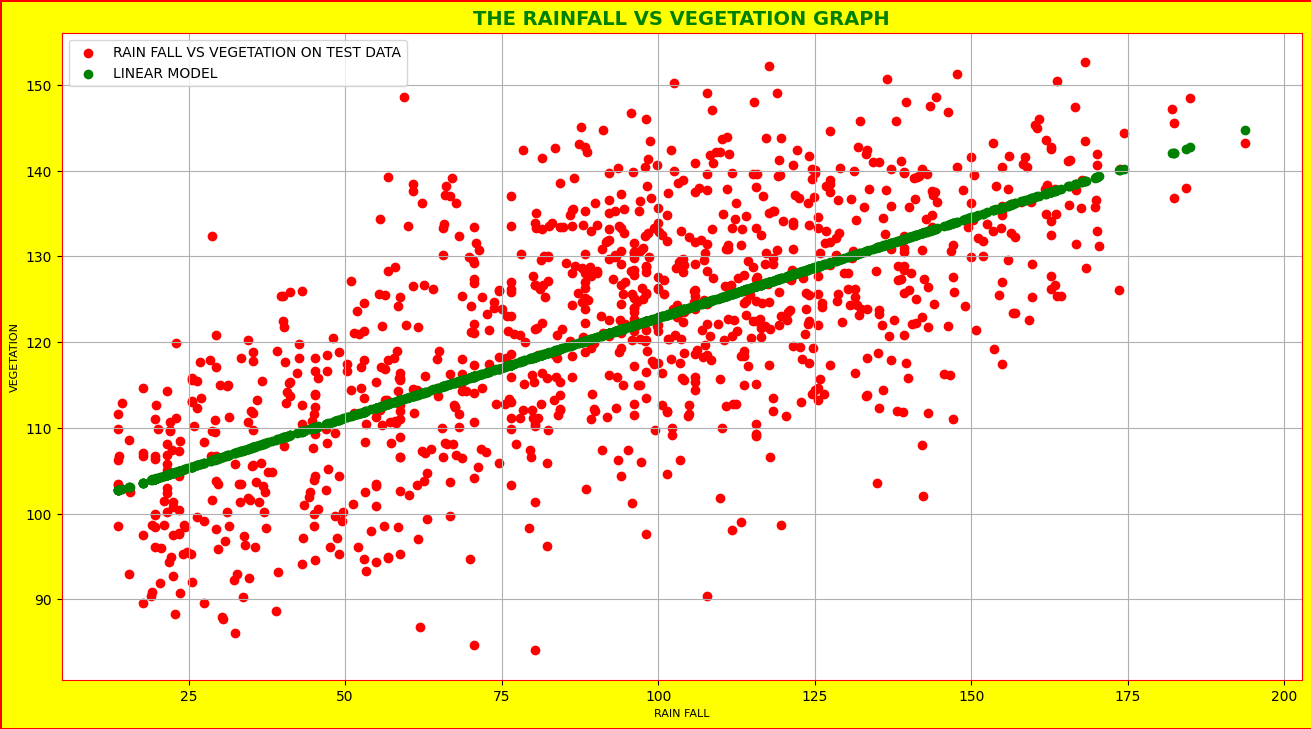

In [2152]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAIN FALL", color="black", fontsize=8)
plt.ylabel("VEGETATION", color="black", fontsize=8)
plt.title("THE RAINFALL VS VEGETATION GRAPH",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING OF THE PREDICTED VALUES OF THE DECISION TREE MODEL
plt.scatter(rainTestSMA, vegTestSMA, color='r',
            label='RAIN FALL VS VEGETATION ON TEST DATA')
plt.scatter(rainTestSMA, vegPred1SMA, color='g',
            label='LINEAR MODEL')

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()


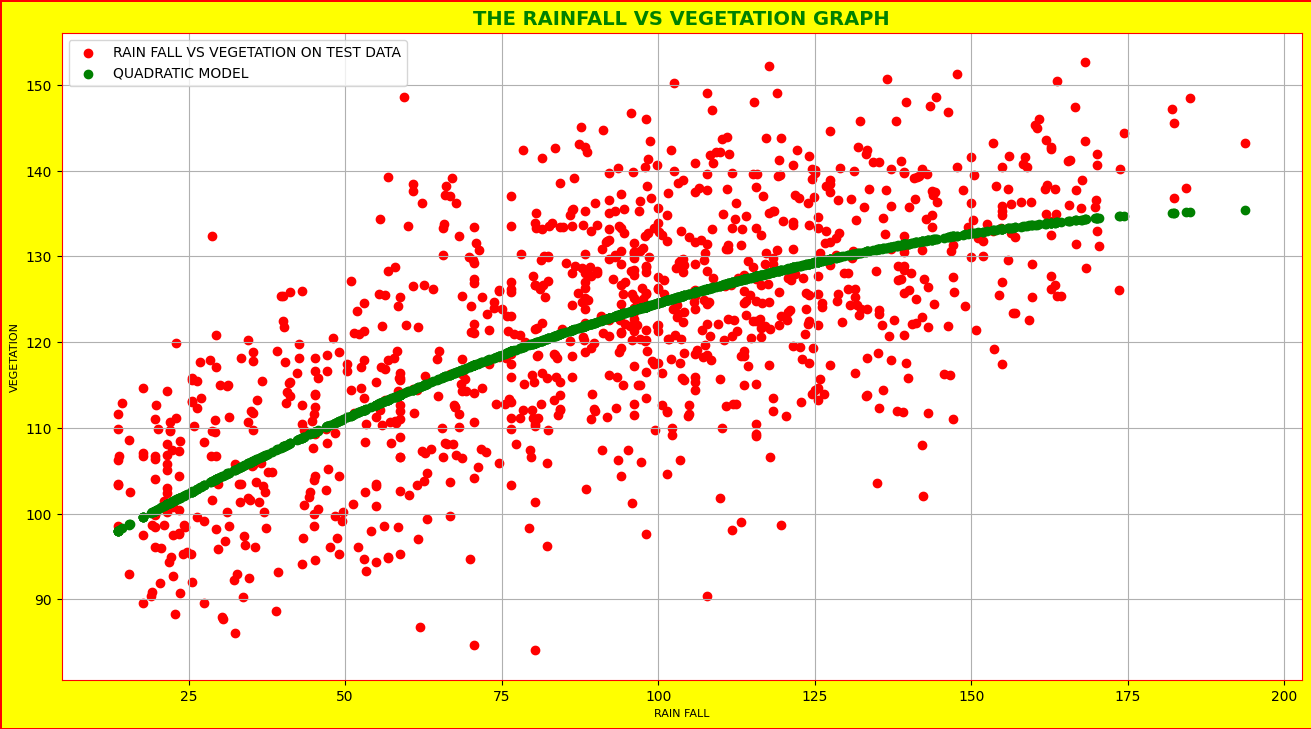

In [2153]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAIN FALL", color="black", fontsize=8)
plt.ylabel("VEGETATION", color="black", fontsize=8)
plt.title("THE RAINFALL VS VEGETATION GRAPH",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING OF THE PREDICTED VALUES OF THE CUBIC MODEL OF SMA RAIN FALL
plt.scatter(rainTestSMA, vegTestSMA, color='r',
            label='RAIN FALL VS VEGETATION ON TEST DATA')
plt.scatter(rainTestSMA, vegPred2SMA, color='g',
            label='QUADRATIC MODEL')

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()


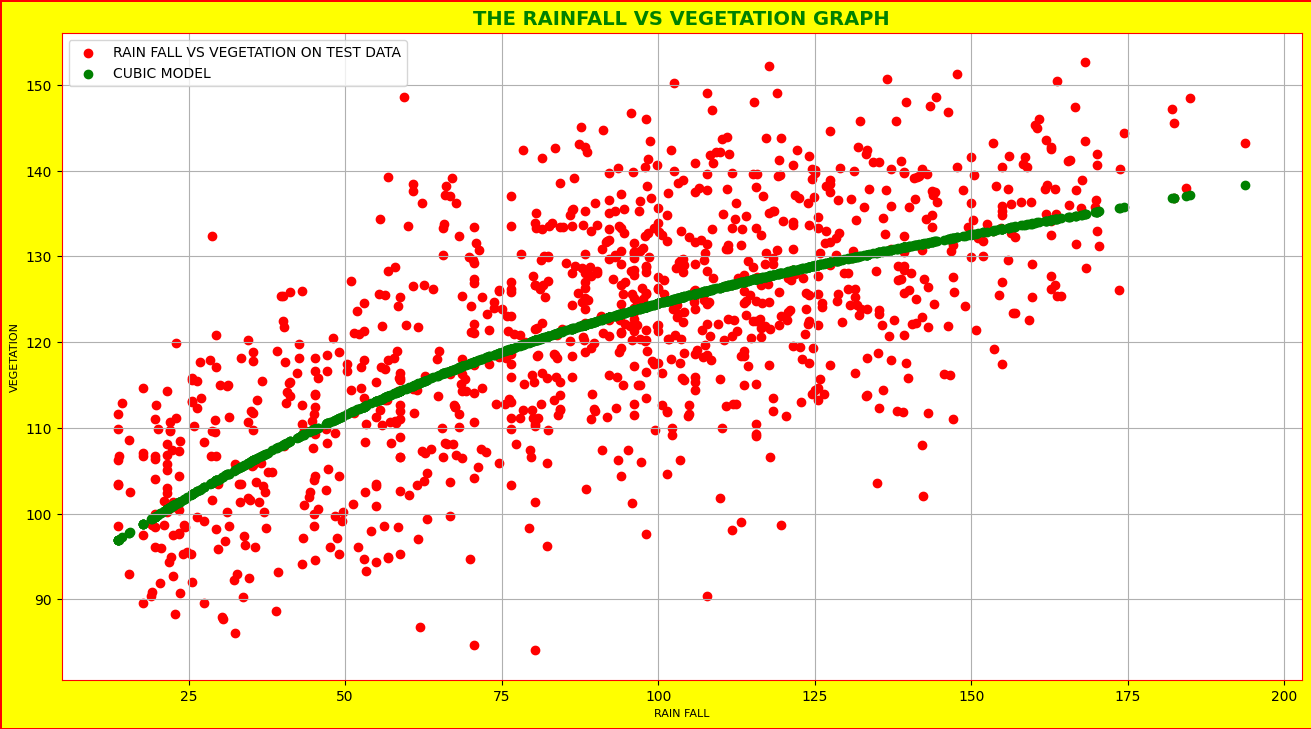

In [2154]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAIN FALL", color="black", fontsize=8)
plt.ylabel("VEGETATION", color="black", fontsize=8)
plt.title("THE RAINFALL VS VEGETATION GRAPH",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING OF THE PREDICTED VALUES OF THE CUBIC MODEL OF SMA RAIN FALL
plt.scatter(rainTestSMA, vegTestSMA, color='r',
            label='RAIN FALL VS VEGETATION ON TEST DATA')
plt.scatter(rainTestSMA, vegPred3SMA, color='g',
            label='CUBIC MODEL')

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()


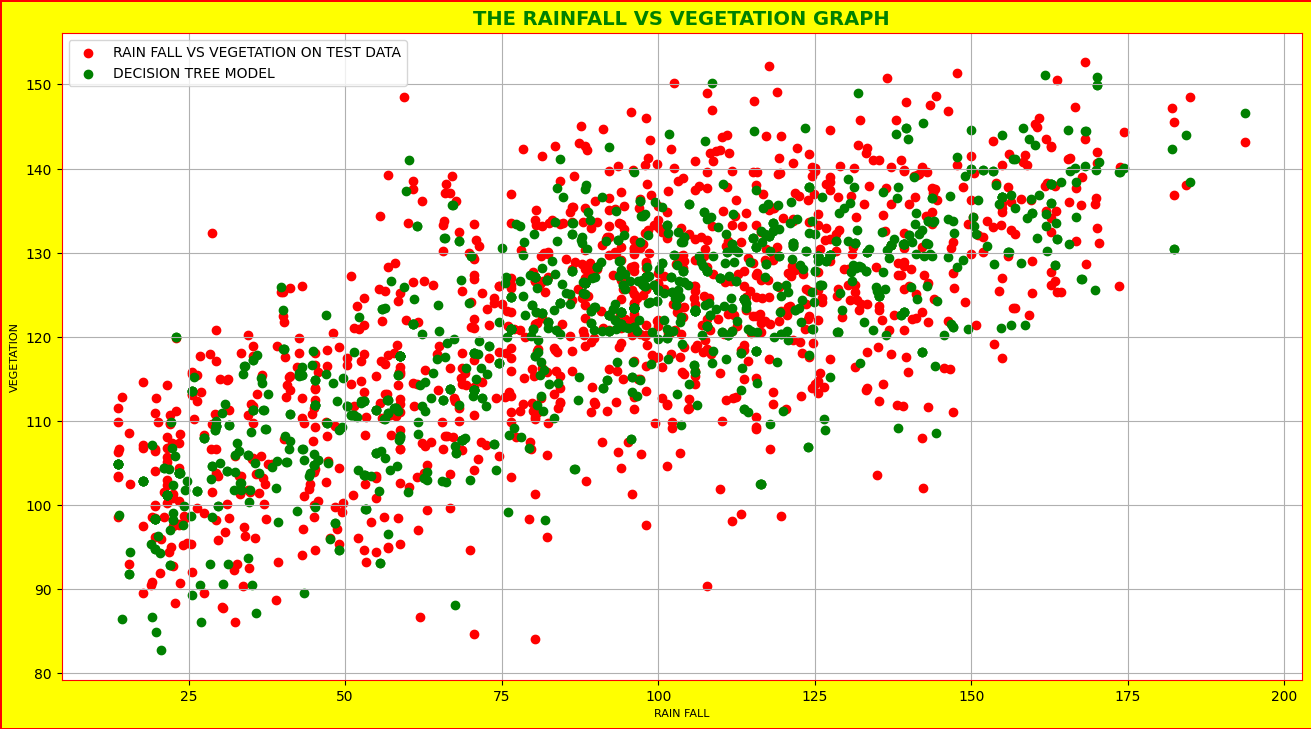

In [2155]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAIN FALL", color="black", fontsize=8)
plt.ylabel("VEGETATION", color="black", fontsize=8)
plt.title("THE RAINFALL VS VEGETATION GRAPH",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING OF THE PREDICTED VALUES OF THE DECISION TREE MODEL
plt.scatter(rainTestSMA, vegTestSMA, color='r',
            label='RAIN FALL VS VEGETATION ON TEST DATA')
plt.scatter(rainTestSMA, vegDTpred, color='g',
            label='DECISION TREE MODEL')

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()


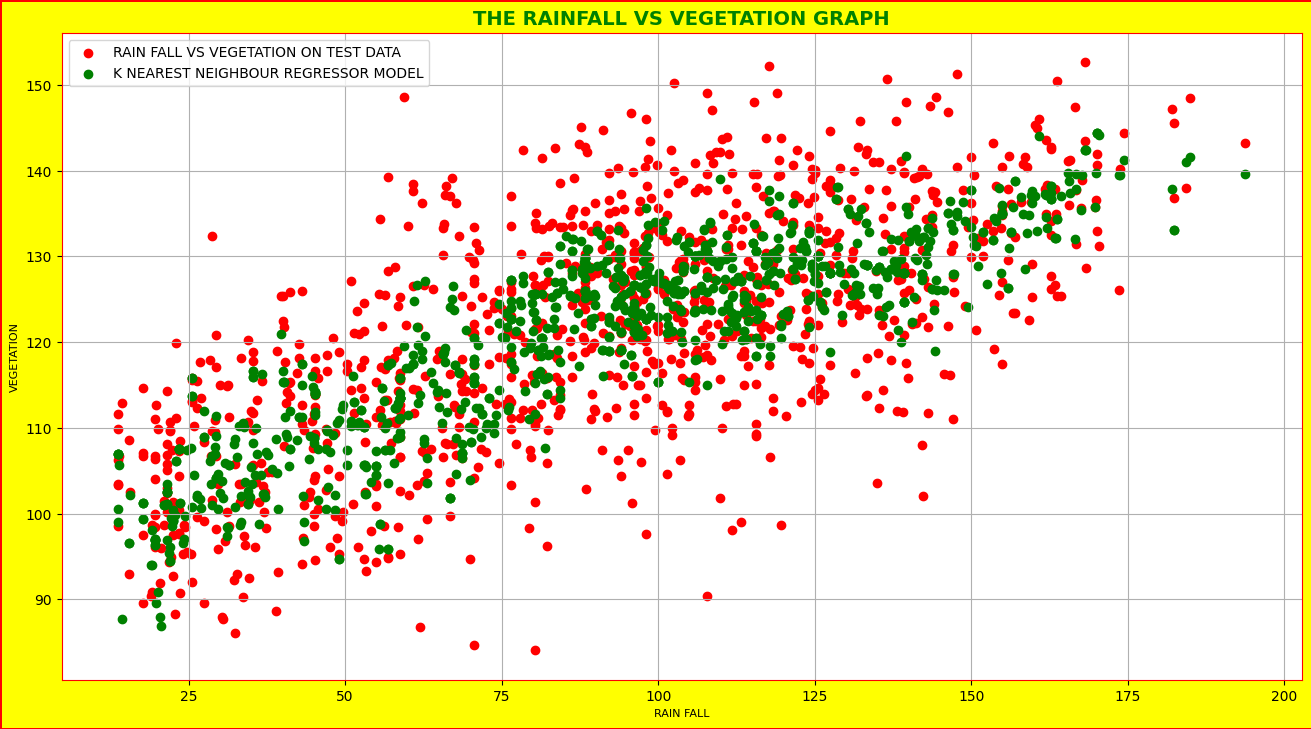

In [2156]:
# SETTING THE SIZE OF THE GRAPH, THE COLOURS, THE LINE WIDTH, AS WELL AS THE LABELS AND TITLE
plt.figure(figsize=(16, 8.4), edgecolor="red", facecolor="yellow", linewidth=1)
plt.xlabel("RAIN FALL", color="black", fontsize=8)
plt.ylabel("VEGETATION", color="black", fontsize=8)
plt.title("THE RAINFALL VS VEGETATION GRAPH",
          color="green", fontsize=14, fontweight="bold")

# PLOTTING OF THE PREDICTED VALUES OF THE K NEAREST NEIGHBOUR REGRESSOR MODEL
plt.scatter(rainTestSMA, vegTestSMA, color='r', label='RAIN FALL VS VEGETATION ON TEST DATA')
plt.scatter(rainTestSMA, vegKNNpred, color='g',
            label='K NEAREST NEIGHBOUR REGRESSOR MODEL')

# ADDING THE LEGEND TO THE GRAPH
plt.legend()
plt.grid()
plt.show()